In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
import dataframe_image as dfi
from pandas.io.formats.style import Styler

In [2]:
data = pd.read_csv('train_ctrUa4K.csv')
print(data.shape)
data.head()

(614, 13)


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
for column in data.iloc[:,1:].select_dtypes(exclude ='float'):
    print(column,' : ', data[column].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes' nan]
ApplicantIncome  :  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860


In [5]:
print(data['Credit_History'].unique())

[ 1.  0. nan]


In [6]:
print(data['Loan_Amount_Term'].unique())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [7]:
print(data['Loan_ID'].value_counts())#vrification si le meme client n a pas fait plusieurs demandes

LP001664    1
LP002547    1
LP002898    1
LP001066    1
LP001034    1
           ..
LP001963    1
LP002792    1
LP002086    1
LP002367    1
LP001570    1
Name: Loan_ID, Length: 614, dtype: int64


In [8]:
pd.set_option('display.max_rows',data.shape[0]+1)
data.style.highlight_null(null_color='red')

In [9]:
pd.set_option('display.max_rows',20)
data.isna().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [10]:
#data = data[data.isnull().sum(axis=1) < 2]

In [11]:
#data['Credit_History'] = data['Credit_History'].astype(str)

In [12]:
def color_cell(df):
    return 'background-color: cyan'

In [13]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
row = ['min','25%','50%','75%','max']

In [14]:
data.describe().style.applymap(color_cell, subset=('max',col)).applymap(color_cell, subset=(row,'Credit_History'))

In [15]:
temp = data.describe().style.applymap(color_cell, subset=('max',col)).applymap(color_cell, subset=(row,'Credit_History'))
dfi.export(temp, 'dfdatades.jpg')

In [16]:
col=['Gender','Married','Dependents','Education','Self_Employed']
row = ['top','freq']

In [17]:
data.describe(include='O').style.applymap(color_cell, subset=(row,col))

In [18]:
temp = data.describe(include='O').style.applymap(color_cell, subset=(row,col))
dfi.export(temp, 'dfdatadeso.jpg')

In [19]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [20]:
datax = data.copy()

In [21]:
datax = datax.replace({'Male':1 ,'Female':0,'Yes':1,'No':0,'3+':3,'Graduate':1,'Not Graduate':0,'Rural':0,'Semiurban':1,'Urban':2,'Y':1,'N':0})
datax

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001002     1.0      0.0          0          1            0.0   
1    LP001003     1.0      1.0          1          1            0.0   
2    LP001005     1.0      1.0          0          1            1.0   
3    LP001006     1.0      1.0          0          0            0.0   
4    LP001008     1.0      0.0          0          1            0.0   
..        ...     ...      ...        ...        ...            ...   
609  LP002978     0.0      0.0          0          1            0.0   
610  LP002979     1.0      1.0          3          1            0.0   
611  LP002983     1.0      1.0          1          1            0.0   
612  LP002984     1.0      1.0          2          1            0.0   
613  LP002990     0.0      0.0          0          1            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Property_Area  Loan_Status  
0               1.0              2            1  
1               1.0              0            0  
2               1.0              2            1  
3               1.0              2            1  
4               1.0              2            1  
..              ...            ...          ...  
609             1.0              0            1  
610             1.0              0            1  
611             1.0              2            1  
612             1.0              2            1  
613             0.0              1            0  

[614 rows x 13 columns]

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
df_filled = imputer.fit_transform(datax.iloc[:,1:])
type(df_filled)

numpy.ndarray

In [23]:
datax2 = pd.DataFrame(data=df_filled,index=datax['Loan_ID'],columns=datax.iloc[:,1:].columns)#nan complete avec knn

In [24]:
datax2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 62.4+ KB


In [25]:
datax2 =datax2.astype(int)
datax2 =datax2.astype(str)
datax2[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = datax2[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].astype(float)
datax2 = datax2.reset_index()
datax2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [26]:
datax2.select_dtypes(exclude ='float').head(5)

Loan_ID Gender Married Dependents Education Self_Employed Credit_History  \
0  LP001002      1       0          0         1             0              1   
1  LP001003      1       1          1         1             0              1   
2  LP001005      1       1          0         1             1              1   
3  LP001006      1       1          0         0             0              1   
4  LP001008      1       0          0         1             0              1   

  Property_Area Loan_Status  
0             2           1  
1             0           0  
2             2           1  
3             2           1  
4             2           1

In [27]:
datax2.select_dtypes('float').head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0           5849.0                0.0       138.0             360.0
1           4583.0             1508.0       128.0             360.0
2           3000.0                0.0        66.0             360.0
3           2583.0             2358.0       120.0             360.0
4           6000.0                0.0       141.0             360.0

In [28]:
datax2.groupby("Loan_Status")["Dependents"].value_counts(normalize=True)

Loan_Status  Dependents
0            0             0.572917
             1             0.203125
             2             0.130208
             3             0.093750
1            0             0.575829
             2             0.182464
             1             0.161137
             3             0.080569
Name: Dependents, dtype: float64

In [29]:
manquantes = ['Gender', 'Married', 'Dependents','Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [30]:
datax2[manquantes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Self_Employed     614 non-null    object 
 4   LoanAmount        614 non-null    float64
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    object 
dtypes: float64(2), object(5)
memory usage: 33.7+ KB


In [31]:
print("données complétées :\n ",  datax2["Credit_History"].groupby(datax2["Loan_Status"]).value_counts(normalize=True),"\n"),print("données d'origine:\n ", data["Credit_History"].groupby(datax2["Loan_Status"]).value_counts(normalize=True))

données complétées :
  Loan_Status  Credit_History
0            1                 0.562500
             0                 0.437500
1            1                 0.966825
             0                 0.033175
Name: Credit_History, dtype: float64 

données d'origine:
  Loan_Status  Credit_History
0            1.0               0.541899
             0.0               0.458101
1            1.0               0.981818
             0.0               0.018182
Name: Credit_History, dtype: float64


(None, None)

In [32]:
for column in datax2[manquantes].select_dtypes(exclude = 'float').columns :
    print("Données complétées :\n ",  datax2[column].groupby(datax2["Loan_Status"]).value_counts(normalize=True),"\n"),print("Données d'origine:\n ", data[column].groupby(datax2["Loan_Status"]).value_counts(normalize=True)),print(40*"-")

Données complétées :
  Loan_Status  Gender
0            1         0.807292
             0         0.192708
1            1         0.819905
             0         0.180095
Name: Gender, dtype: float64 

Données d'origine:
  Loan_Status  Gender
0            Male      0.802139
             Female    0.197861
1            Male      0.818841
             Female    0.181159
Name: Gender, dtype: float64
----------------------------------------
Données complétées :
  Loan_Status  Married
0            1          0.588542
             0          0.411458
1            1          0.680095
             0          0.319905
Name: Married, dtype: float64 

Données d'origine:
  Loan_Status  Married
0            Yes        0.588542
             No         0.411458
1            Yes        0.680191
             No         0.319809
Name: Married, dtype: float64
----------------------------------------
Données complétées :
  Loan_Status  Dependents
0            0             0.572917
             1         

In [33]:
datax.groupby("Loan_Status")["Dependents"].value_counts(normalize=True)

Loan_Status  Dependents
0            0             0.575269
             1             0.193548
             2             0.134409
             3             0.096774
1            0             0.576271
             2             0.184019
             1             0.159806
             3             0.079903
Name: Dependents, dtype: float64

In [34]:
for column in datax2[manquantes].select_dtypes(exclude = 'float').columns :
    print("Données complétées :\n ",  datax2[column].groupby(datax2["Loan_Status"]).value_counts(normalize=True),"\n"),print("Données d'origine:\n ", data[column].groupby(datax2["Loan_Status"]).value_counts(normalize=True)),print(40*"-")

Données complétées :
  Loan_Status  Gender
0            1         0.807292
             0         0.192708
1            1         0.819905
             0         0.180095
Name: Gender, dtype: float64 

Données d'origine:
  Loan_Status  Gender
0            Male      0.802139
             Female    0.197861
1            Male      0.818841
             Female    0.181159
Name: Gender, dtype: float64
----------------------------------------
Données complétées :
  Loan_Status  Married
0            1          0.588542
             0          0.411458
1            1          0.680095
             0          0.319905
Name: Married, dtype: float64 

Données d'origine:
  Loan_Status  Married
0            Yes        0.588542
             No         0.411458
1            Yes        0.680191
             No         0.319809
Name: Married, dtype: float64
----------------------------------------
Données complétées :
  Loan_Status  Dependents
0            0             0.572917
             1         

In [35]:
datax2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [36]:
for column in datax2[manquantes].select_dtypes(exclude = 'float').columns :
    temp = datax2[[column,'Loan_Status']].pivot_table(index = column, columns = 'Loan_Status', aggfunc='size', fill_value=0)
    temp = temp/temp.sum().sum()
    print (34*'*')
    print ('Données complétées :')
    print (temp)

**********************************
Données complétées :
Loan_Status         0         1
Gender                         
0            0.060261  0.123779
1            0.252443  0.563518
**********************************
Données complétées :
Loan_Status         0         1
Married                        
0            0.128664  0.219870
1            0.184039  0.467427
**********************************
Données complétées :
Loan_Status         0         1
Dependents                     
0            0.179153  0.395765
1            0.063518  0.110749
2            0.040717  0.125407
3            0.029316  0.055375
**********************************
Données complétées :
Loan_Status           0         1
Self_Employed                    
0              0.268730  0.591205
1              0.043974  0.096091
**********************************
Données complétées :
Loan_Status            0         1
Credit_History                    
0               0.136808  0.022801
1               0.175896  0.664

In [37]:
datax2[manquantes].select_dtypes(exclude = 'float').columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History'], dtype='object')

In [38]:
moddt = datax.copy()
moddt[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']]  = moddt[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']].astype(str)
for column in moddt[manquantes].select_dtypes(exclude = 'float').columns :
    temp = moddt[[column,'Loan_Status']].pivot_table(index = column, columns = 'Loan_Status', aggfunc='size', fill_value=0)
    temp = temp/temp.sum().sum()
    print (34*'*')
    print ("Données d'origine :")
    print (temp)

**********************************
Données d'origine :
Loan_Status         0         1
Gender                         
0.0          0.060261  0.122150
1.0          0.244300  0.552117
nan          0.008143  0.013029
**********************************
Données d'origine :
Loan_Status         0         1
Married                        
0.0          0.128664  0.218241
1.0          0.184039  0.464169
nan          0.000000  0.004886
**********************************
Données d'origine :
Loan_Status         0         1
Dependents                     
0            0.174267  0.387622
1            0.058632  0.107492
2            0.040717  0.123779
3            0.029316  0.053746
nan          0.009772  0.014658
**********************************
Données d'origine :
Loan_Status           0         1
Self_Employed                    
0.0            0.255700  0.558632
1.0            0.042345  0.091205
nan            0.014658  0.037459
**********************************
Données d'origine :
Loan_Status

In [39]:
manquantes = ['Gender', 'Married', 'Dependents','Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [40]:
def color_cell(df):
    return 'background-color: cyan'
col = ['LoanAmount','Loan_Amount_Term']
row = ['mean','std','50%']

In [41]:
desn = datax2[manquantes].describe().style.applymap(color_cell, subset=(row,col))
dfi.export(desn, 'desn.jpg')
desn

In [42]:
moddt = datax.copy()
moddt[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']]  = moddt[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']].astype(str)
deso = moddt[manquantes].describe().style.applymap(color_cell, subset=(row,col))
dfi.export(deso, 'deso.jpg')
deso

In [43]:
data[manquantes].describe(include='O')

Gender Married Dependents Self_Employed
count     601     611        599           582
unique      2       2          4             2
top      Male     Yes          0            No
freq      489     398        345           500

In [44]:
datax2[manquantes].describe(include='O')

Gender Married Dependents Self_Employed Credit_History
count     614     614        614           614            614
unique      2       2          4             2              2
top         1       1          0             0              1
freq      501     400        353           528            516

In [45]:
datax2.CoapplicantIncome

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

In [46]:
for column in data.iloc[:,1:].select_dtypes(exclude ='float'):
    print(column,' : ', data[column].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes' nan]
ApplicantIncome  :  [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860


In [47]:
for column in datax2:
    print(column,' : ', datax2[column].unique())

Loan_ID  :  ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP00

In [48]:
datax2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [49]:
#datax.isna().sum().sort_values(ascending = False)
datax2.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
datax2.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000          614.00000  614.000000        614.000000
mean       5403.459283         1621.24430  146.084691        341.433225
std        6109.041673         2926.24876   85.730387         65.422442
min         150.000000            0.00000    9.000000         12.000000
25%        2877.500000            0.00000  100.000000        360.000000
50%        3812.500000         1188.50000  127.000000        360.000000
75%        5795.000000         2297.25000  167.750000        360.000000
max       81000.000000        41667.00000  700.000000        480.000000

In [51]:
datax.describe()

Gender     Married   Education  Self_Employed  ApplicantIncome  \
count  601.000000  611.000000  614.000000     582.000000       614.000000   
mean     0.813644    0.651391    0.781759       0.140893      5403.459283   
std      0.389718    0.476920    0.413389       0.348211      6109.041673   
min      0.000000    0.000000    0.000000       0.000000       150.000000   
25%      1.000000    0.000000    1.000000       0.000000      2877.500000   
50%      1.000000    1.000000    1.000000       0.000000      3812.500000   
75%      1.000000    1.000000    1.000000       0.000000      5795.000000   
max      1.000000    1.000000    1.000000       1.000000     81000.000000   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
count         614.000000  592.000000         600.00000      564.000000   
mean         1621.245798  146.412162         342.00000        0.842199   
std          2926.248369   85.587325          65.12041        0.364878   
min             0.000000    9.000000          12.00000        0.000000   
25%             0.000000  100.000000         360.00000        1.000000   
50%          1188.500000  128.000000         360.00000        1.000000   
75%          2297.250000  168.000000         360.00000        1.000000   
max         41667.000000  700.000000         480.00000        1.000000   

       Property_Area  Loan_Status  
count     614.000000   614.000000  
mean        1.037459     0.687296  
std         0.787482     0.463973  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     1.000000  
75%         2.000000     1.000000  
max         2.000000     1.000000

In [52]:
datax.describe(include='O')

Loan_ID Dependents
count        614        599
unique       614          4
top     LP001664          0
freq           1        345

In [53]:
datax2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
datax2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


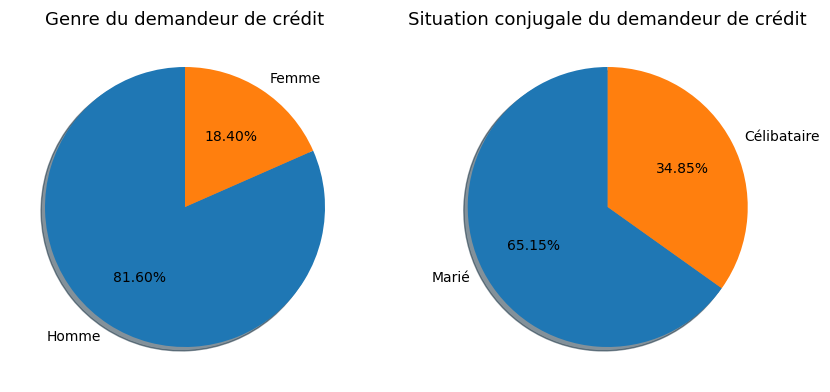

In [55]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo=datax2['Gender'].replace({'1' : 'Homme','0' :'Femme'}).value_counts().copy()
momo2=datax2['Married'].replace({'1' : 'Marié','0' :'Célibataire'}).value_counts().copy()


plt.subplot(221)
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Genre du demandeur de crédit", fontsize=13)

plt.subplot(222)
plt.pie(momo2.values,labels=momo2.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Situation conjugale du demandeur de crédit", fontsize=13)

plt.savefig("uni_1.jpg",bbox_inches ="tight")
plt.show()

In [56]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo=datax2['Dependents'].replace({'1' : '1 enfant','0' :'sans enfant','2' : '2 enfants','3' :'3 enfants ou +'}).value_counts().copy()
momo2=datax2['Education'].replace({'1' : 'Diplomé','0' :'Sans diplome'}).value_counts().copy()


plt.subplot(221)
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Nombre d'enfants du demandeur de crédit", fontsize=13)

plt.subplot(222)
plt.pie(momo2.values,labels=momo2.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Niveau scolaire du demandeur de crédit", fontsize=13)

plt.savefig("uni_2.jpg",bbox_inches ="tight")
plt.show()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [58]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
toto=datax2['Self_Employed'].replace({'1' : 'à son compte','0' :'salarié'}).value_counts().copy()
temp = datax2.copy()
#temp = temp.sort_values('Loan_Amount_Term')
temp[['Loan_Amount_Term']] = temp[['Loan_Amount_Term']].astype(int)
#toto2=(temp['Loan_Amount_Term'].astype(str)).value_counts(sort=False).copy()
toto2=datax2['Credit_History'].replace({'1' : 'fiable','0' :'peu fiable'}).value_counts().copy()


plt.subplot(221)
plt.bar(toto.index,toto,color=["blue","red"])
plt.title("Nombre de demandes en fonction de \n la situation salariale du demandeur", fontsize=12)
plt.ylabel("Nombre de demandes",color='k',fontsize=12)
plt.xlabel("Situation salariale", color='k',fontsize=12)

plt.subplot(222)
plt.bar(toto2.index,toto2,color=["green","red"])
plt.title("Nombre de demandes en fonction de \n la réputation bancaire", fontsize=12)
plt.ylabel("Nombre de demandes",color='k',fontsize=12)
plt.xlabel("Réputation bancaire \n (capacité à rembourser un emprunt)", color='k',fontsize=12)

plt.savefig("uni_3.jpg",bbox_inches ="tight")
plt.show()

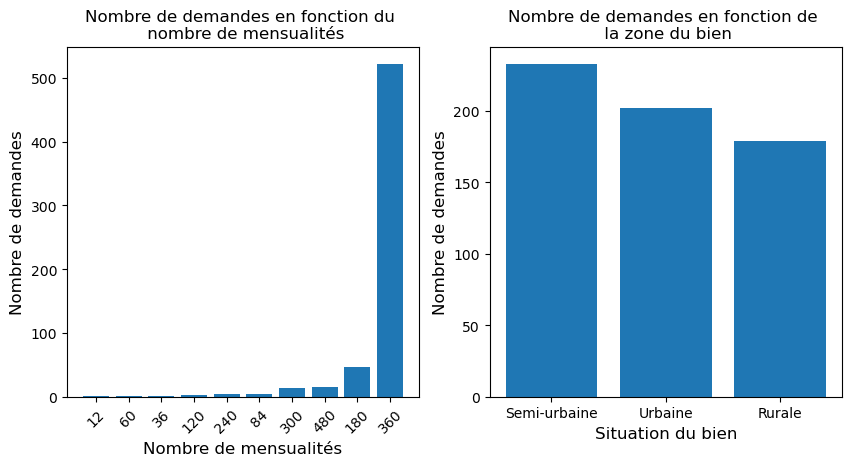

In [59]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
temp = datax2.copy()
#temp = temp.sort_values('Loan_Amount_Term')
temp[['Loan_Amount_Term']] = temp[['Loan_Amount_Term']].astype(int)
toto=(temp['Loan_Amount_Term'].astype(str)).value_counts(sort=False).copy()
toto = toto.sort_values()
toto2=datax2['Property_Area'].replace({'0':'Rurale','1':'Semi-urbaine','2':'Urbaine'}).value_counts().copy()

plt.subplot(221)
plt.bar(toto.index,toto)

plt.xticks(fontsize=10, rotation=45)
plt.title("Nombre de demandes en fonction du \n nombre de mensualités", fontsize=12)
plt.ylabel("Nombre de demandes",color='k',fontsize=12)
plt.xlabel("Nombre de mensualités", color='k',fontsize=12)


plt.subplot(222)
plt.bar(toto2.index,toto2)

plt.title("", fontsize=10)
plt.title("Nombre de demandes en fonction de \n la zone du bien", fontsize=12)
plt.ylabel("Nombre de demandes",color='k',fontsize=12)
plt.xlabel("Situation du bien", color='k',fontsize=12)

plt.savefig("uni_4.jpg",bbox_inches ="tight")
plt.show()

In [60]:
plt.style.use('default')
momo=datax2['Loan_Status'].replace({'1':'Favorables','0' : 'Défavorables'}).value_counts().copy()
plt.title("Répartion des réponses aux\ndemandes de financement", fontsize=13)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.savefig("uni_5.jpg",bbox_inches ="tight")
plt.show()

In [61]:
#profile type
temp = datax2.copy()
temp = temp.loc[(temp['Gender']=='1') & (temp['Married']=='1') & (temp['Dependents']=='0') & (temp['Education']=='1') & (temp['Self_Employed']=='0') & (temp['Credit_History']=='1')]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
26   LP001068      1       1          0         1             0   
33   LP001098      1       1          0         1             0   
35   LP001106      1       1          0         1             0   
42   LP001123      1       1          0         1             0   
43   LP001131      1       1          0         1             0   
..        ...    ...     ...        ...       ...           ...   
562  LP002820      1       1          0         1             0   
586  LP002916      1       1          0         1             0   
590  LP002928      1       1          0         1             0   
593  LP002936      1       1          0         1             0   
608  LP002974      1       1          0         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
26            2799.0             2253.0       122.0             360.0   
33            3500.0             1667.0       114.0             360.0   
35            2275.0             2067.0       110.0             360.0   
42            2400.0                0.0        75.0             360.0   
43            3941.0             2336.0       134.0             360.0   
..               ...                ...         ...               ...   
562           5923.0             2054.0       211.0             360.0   
586           2297.0             1522.0       104.0             360.0   
590           3000.0             3416.0        56.0             180.0   
593           3859.0             3300.0       142.0             180.0   
608           3232.0             1950.0       108.0             360.0   

    Credit_History Property_Area Loan_Status  
26               1             1           1  
33               1             1           1  
35               1             2           1  
42               1             2           1  
43               1             1           1  
..             ...           ...         ...  
562              1             0           1  
586              1             2           1  
590              1             1           1  
593              1             0           1  
608              1             0           1  

[104 rows x 13 columns]

In [62]:
temp['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.884615
180.0    0.096154
12.0     0.009615
300.0    0.009615
Name: Loan_Amount_Term, dtype: float64

In [63]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'Favorables','0' : 'Défavorables'}).value_counts().copy()
plt.title("Réponses aux demandes 'profil type'", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()
#le profil type represente 104 demandes sur 614

In [64]:
(temp['Loan_Status'].value_counts()/temp['Loan_Status'].value_counts().sum())[0]

0.8269230769230769

In [65]:
#profile type avec credit history defavorable
temp = datax2.select_dtypes(exclude ='float').copy()
temp = temp.loc[(temp['Gender']=='1') & (temp['Married']=='1') & (temp['Dependents']=='0') & (temp['Education']=='1') & (temp['Self_Employed']=='0') & (temp['Credit_History']=='0')]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
36   LP001109      1       1          0         1             0   
220  LP001736      1       1          0         1             0   
348  LP002137      1       1          0         1             0   
363  LP002178      1       1          0         1             0   
377  LP002223      1       1          0         1             0   
452  LP002448      1       1          0         1             0   
453  LP002449      1       1          0         1             0   
494  LP002585      1       1          0         1             0   
554  LP002789      1       1          0         1             0   
569  LP002841      1       1          0         1             0   
576  LP002872      1       1          0         1             0   

    Credit_History Property_Area Loan_Status  
36               0             2           0  
220              0             2           0  
348              0             1           1  
363              0             2           1  
377              0             1           1  
452              0             0           0  
453              0             0           1  
494              0             0           0  
554              0             0           0  
569              0             2           0  
576              0             1           0

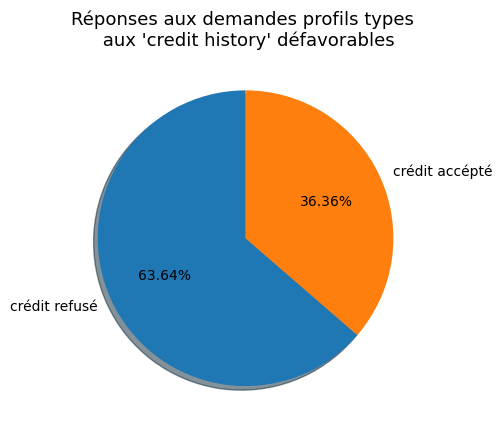

In [66]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux demandes profils types \n aux 'credit history' défavorables", fontsize=13)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
#plt.savefig("uni_5.jpg",bbox_inches ="tight")
plt.show()

In [67]:
(temp['Loan_Status'].value_counts()/temp['Loan_Status'].value_counts().sum())[0]

0.6363636363636364

In [68]:
#profile pas type
temp = datax2.select_dtypes(exclude ='float').copy()
temp = temp.loc[(temp['Gender']=='1') & (temp['Married']=='1') & (temp['Dependents']=='0') & (temp['Education']=='1') & (temp['Self_Employed']=='0') & (temp['Credit_History']=='1')]
#temp2 = datax2.loc[df3['Exist'] != 'both']
temp2 = datax2.loc[datax2.index.symmetric_difference(temp.index)]

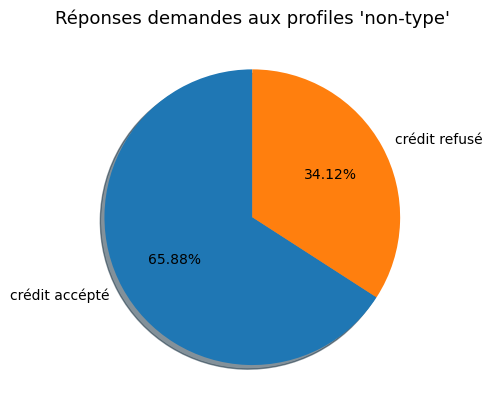

In [69]:
plt.style.use('default')
momo=temp2['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses demandes aux profiles 'non-type'", fontsize=13)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
#plt.savefig("uni_5.jpg",bbox_inches ="tight")
plt.show()

In [70]:
datax2.iloc[460]

Loan_ID              LP002478
Gender                      1
Married                     1
Dependents                  0
Education                   1
Self_Employed               1
ApplicantIncome          2083
CoapplicantIncome        4083
LoanAmount                160
Loan_Amount_Term          360
Credit_History              0
Property_Area               1
Loan_Status                 1
Name: 460, dtype: object

In [71]:
(temp['Loan_Status'].value_counts()/temp['Loan_Status'].value_counts().sum())[0]

0.8269230769230769

In [72]:
datax2['ApplicantIncome'].value_counts()

2500.0    9
2600.0    6
4583.0    6
6000.0    6
3750.0    5
         ..
2787.0    1
3652.0    1
6540.0    1
3340.0    1
6333.0    1
Name: ApplicantIncome, Length: 505, dtype: int64

la moyenne de la colonne  ApplicantIncome 5403.459283387622
la mediane de la colonne  ApplicantIncome 3812.5
Ecart-type: 6104.064856533888


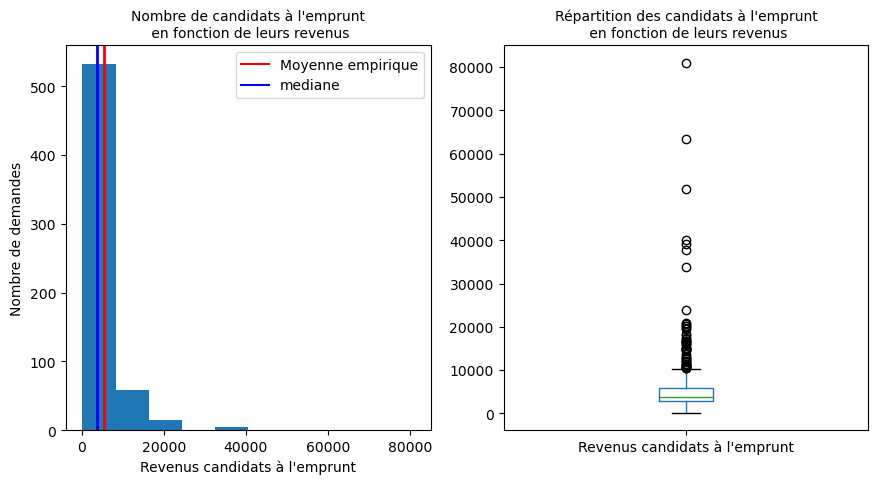

In [73]:
plt.subplot(131)
import matplotlib.lines as mlines
column = 'ApplicantIncome'
print("la moyenne de la colonne ",column, datax2[column].mean())
print("la mediane de la colonne ",column, datax2[column].median())
print("Ecart-type:",datax2[column].std(ddof=0))
#sns.displot(datax2[column], kind='kde')
plt.hist(datax2[column])
plt.axvline(datax2[column].mean(), color='r', linewidth=2)
plt.axvline(datax2[column].median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])
plt.title("Nombre de candidats à l'emprunt\n en fonction de leurs revenus", fontsize=10)
plt.ylabel("Nombre de demandes",color='k',fontsize=10)
plt.xlabel("Revenus candidats à l'emprunt", color='k',fontsize=10)


plt.subplot(132)
datax2[column].plot(kind='box',figsize=(16,5),label="Revenus candidats à l'emprunt", showfliers=True)
plt.title("Répartition des candidats à l'emprunt\n en fonction de leurs revenus", fontsize=10)
#plt.ylabel("Revenus de l'emprunteur",color='k',fontsize=9)
plt.savefig("cont1.jpg",bbox_inches ="tight")
plt.draw()

la moyenne de la colonne  CoapplicantIncome 1621.244299674267
la mediane de la colonne  CoapplicantIncome 1188.5
Ecart-type: 2923.864850406858


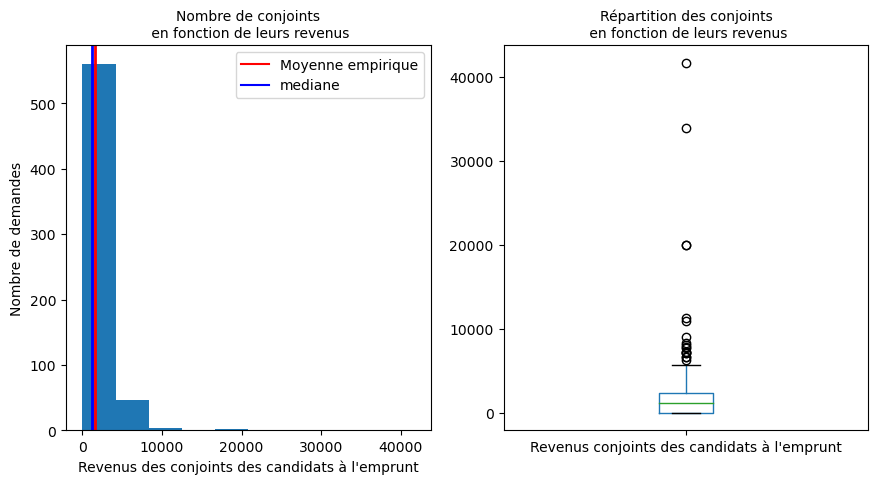

In [74]:
plt.subplot(131)
import matplotlib.lines as mlines
column = 'CoapplicantIncome'
print("la moyenne de la colonne ",column, datax2[column].mean())
print("la mediane de la colonne ",column, datax2[column].median())
print("Ecart-type:",datax2[column].std(ddof=0))
#sns.displot(datax2[column], kind='kde')
plt.hist(datax2[column])
plt.axvline(datax2[column].mean(), color='r', linewidth=2)
plt.axvline(datax2[column].median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])
plt.title("Nombre de conjoints\n en fonction de leurs revenus", fontsize=10)
plt.ylabel("Nombre de demandes",color='k',fontsize=10)
plt.xlabel("Revenus des conjoints des candidats à l'emprunt", color='k',fontsize=10)


plt.subplot(132)
datax2[column].plot(kind='box',figsize=(16,5),label="Revenus conjoints des candidats à l'emprunt", showfliers=True)
plt.title("Répartition des conjoints\n en fonction de leurs revenus", fontsize=10)
#plt.ylabel("Revenus de l'emprunteur",color='k',fontsize=9)
plt.savefig("cont2.jpg",bbox_inches ="tight")
plt.draw()

In [75]:
plt.subplot(131)
import matplotlib.lines as mlines
column = 'LoanAmount'
print("la moyenne de la colonne ",column, datax2[column].mean())
print("la mediane de la colonne ",column, datax2[column].median())
print("Ecart-type:",datax2[column].std(ddof=0))
#sns.displot(datax2[column], kind='kde')

plt.hist(datax2[column])
plt.axvline(datax2[column].mean(), color='r', linewidth=2)
plt.axvline(datax2[column].median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])

plt.title("Nombre de demandes en fonction du montant demandé", fontsize=10)
plt.ylabel("Nombre de demandes",color='k',fontsize=10)
plt.xlabel("Montant demandé (en milliers)", color='k',fontsize=10)


plt.subplot(132)
datax2[column].plot(kind='box',figsize=(16,5),label="Montant demandé (en milliers)", showfliers=True)
plt.title("Répartition des montants demandés", fontsize=10)
plt.savefig("cont3.jpg",bbox_inches ="tight")
plt.draw()

la moyenne de la colonne  LoanAmount 146.08469055374593
la mediane de la colonne  LoanAmount 127.0
Ecart-type: 85.66054508268022


In [76]:
df = datax2.drop(['Loan_Amount_Term'], axis=1).select_dtypes('float').copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outiers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_sansout = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outiers

ApplicantIncome  CoapplicantIncome  LoanAmount
9            12841.0            10968.0       349.0
12            3073.0             8106.0       200.0
21            5955.0             5625.0       315.0
34           12500.0             3000.0       320.0
38            4166.0             7210.0       184.0
..               ...                ...         ...
581           1836.0            33837.0        90.0
592           9357.0                0.0       292.0
594          16120.0                0.0       260.0
600            416.0            41667.0       350.0
604          12000.0                0.0       496.0

[77 rows x 3 columns]

In [77]:
datax2.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000          614.00000  614.000000        614.000000
mean       5403.459283         1621.24430  146.084691        341.433225
std        6109.041673         2926.24876   85.730387         65.422442
min         150.000000            0.00000    9.000000         12.000000
25%        2877.500000            0.00000  100.000000        360.000000
50%        3812.500000         1188.50000  127.000000        360.000000
75%        5795.000000         2297.25000  167.750000        360.000000
max       81000.000000        41667.00000  700.000000        480.000000

In [78]:
#automatisation de recherche outliers selon la technique IQR score 
def shout(df):
    for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        out = df[column][((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
        print("Q1:",Q1,"Q3:",Q3)
        print("variable : ", column,"\n","valeurs aberantes :",out.shape[0],"\n",out)

In [79]:
df = datax2.drop(['Loan_Amount_Term'], axis=1).select_dtypes('float').copy()
shout(df)

Q1: 2877.5 Q3: 5795.0
variable :  ApplicantIncome 
 valeurs aberantes : 50 
 9      12841.0
34     12500.0
54     11500.0
67     10750.0
102    13650.0
        ...   
534    18165.0
561    19484.0
572    16666.0
594    16120.0
604    12000.0
Name: ApplicantIncome, Length: 50, dtype: float64
Q1: 0.0 Q3: 2297.25
variable :  CoapplicantIncome 
 valeurs aberantes : 18 
 9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     7873.0
402    20000.0
417    20000.0
444     8333.0
506     6667.0
513     6666.0
523     7166.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64
Q1: 100.0 Q3: 167.75
variable :  LoanAmount 
 valeurs aberantes : 40 
 9      349.0
21     315.0
34     320.0
54     286.0
67     312.0
       ...  
561    600.0
572    275.0
592    292.0
600    350.0
604    496.0
Name: LoanAmount, Length: 40, dtype: float64


In [80]:
ab = df_sansout.index

In [81]:
datax2_so = datax2.loc[ab].copy()

In [82]:
datax2_so #sans outliers (les demandes dont les donnees sont aberrantes sont retirées, -77 )

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002      1       0          0         1             0   
1    LP001003      1       1          1         1             0   
2    LP001005      1       1          0         1             1   
3    LP001006      1       1          0         0             0   
4    LP001008      1       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
609  LP002978      0       0          0         1             0   
610  LP002979      1       1          3         1             0   
611  LP002983      1       1          1         1             0   
612  LP002984      1       1          2         1             0   
613  LP002990      0       0          0         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       138.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0                1             2           1  
1                1             0           0  
2                1             2           1  
3                1             2           1  
4                1             2           1  
..             ...           ...         ...  
609              1             0           1  
610              1             0           1  
611              1             2           1  
612              1             2           1  
613              0             1           0  

[537 rows x 13 columns]

In [83]:
df_sansout.skew(), df_outiers.skew()

(ApplicantIncome      1.132011
 CoapplicantIncome    0.837800
 LoanAmount           0.485477
 dtype: float64,
 ApplicantIncome      2.789051
 CoapplicantIncome    3.463417
 LoanAmount           0.639041
 dtype: float64)

In [84]:
df_sansout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 613
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    537 non-null    float64
 1   CoapplicantIncome  537 non-null    float64
 2   LoanAmount         537 non-null    float64
dtypes: float64(3)
memory usage: 16.8 KB


In [85]:
temp = datax2_so.copy()
totalok_ch = temp.loc[(temp['Credit_History']=='1') & (temp['Loan_Status']=='1')].shape[0]+temp.loc[(temp['Credit_History']=='0') & (temp['Loan_Status']=='0')].shape[0]
totalok_ch/temp.shape[0]
#81 pourcent des cas sont determines par le credit history dans le cas dde donnees non aberrantes..

0.8119180633147114

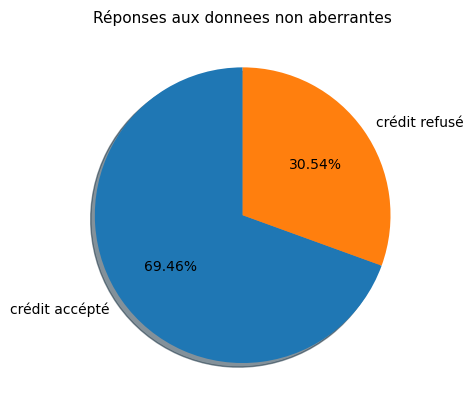

In [86]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux donnees non aberrantes", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [87]:
Q1 - (1.5 * IQR) , Q3 + (1.5 * IQR)

(ApplicantIncome     -1498.750
 CoapplicantIncome   -3445.875
 LoanAmount             -1.625
 dtype: float64,
 ApplicantIncome      10171.250
 CoapplicantIncome     5743.125
 LoanAmount             269.375
 dtype: float64)

In [88]:
datax2.skew()

Gender              -1.634695
Married             -0.637293
Dependents           0.985897
Education           -1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.666462
Loan_Amount_Term    -2.325028
Credit_History      -1.863380
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [89]:
np.log(datax2.drop(['Loan_Amount_Term'], axis=1).replace({0.0:0.01}).select_dtypes('float')).skew()

ApplicantIncome      0.479580
CoapplicantIncome   -0.202930
LoanAmount          -0.179053
dtype: float64

In [90]:
cd = df_outiers.index
datax2_ao = datax2.loc[cd].copy()
datax2_ao #outliers uniquement (uniquement les demandes dont les donnees sont aberrantes, soit 77)

Loan_ID Gender Married Dependents Education Self_Employed  \
9    LP001020      1       1          1         1             0   
12   LP001028      1       1          2         1             0   
21   LP001046      1       1          1         1             0   
34   LP001100      1       0          3         1             0   
38   LP001114      1       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
581  LP002893      1       0          0         1             0   
592  LP002933      1       0          3         1             1   
594  LP002938      1       1          0         1             1   
600  LP002949      0       0          3         1             0   
604  LP002959      0       1          1         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
9            12841.0            10968.0       349.0             360.0   
12            3073.0             8106.0       200.0             360.0   
21            5955.0             5625.0       315.0             360.0   
34           12500.0             3000.0       320.0             360.0   
38            4166.0             7210.0       184.0             360.0   
..               ...                ...         ...               ...   
581           1836.0            33837.0        90.0             360.0   
592           9357.0                0.0       292.0             360.0   
594          16120.0                0.0       260.0             360.0   
600            416.0            41667.0       350.0             180.0   
604          12000.0                0.0       496.0             360.0   

    Credit_History Property_Area Loan_Status  
9                1             1           0  
12               1             2           1  
21               1             2           1  
34               1             0           0  
38               1             2           1  
..             ...           ...         ...  
581              1             2           0  
592              1             1           1  
594              1             2           1  
600              1             2           0  
604              1             1           1  

[77 rows x 13 columns]

In [91]:
totalok_ch = datax2_ao.loc[(datax2_ao['Credit_History']=='1') & (datax2_ao['Loan_Status']=='1')].shape[0]+datax2_ao.loc[(datax2_ao['Credit_History']=='0') & (datax2_ao['Loan_Status']=='0')].shape[0]
totalok_ch/datax2_ao.shape[0]
#72 pourcent des cas sont determines par le credit history dans le cas des outliers..

0.7272727272727273

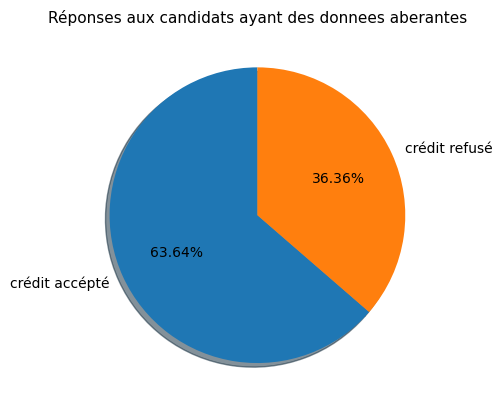

In [92]:
temp = datax2_ao.copy()
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux candidats ayant des donnees aberantes", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [93]:
#Revenus de l'emprunteur + co emprunteur
plt.subplot(131)
import matplotlib.lines as mlines
all_incomes = datax2['CoapplicantIncome']+datax2['ApplicantIncome']
print("la moyenne salaire du couple ", all_incomes.mean())
print("la mediane salaire du couple ", all_incomes.median())
print("Ecart-type:",all_incomes.std(ddof=0))
#sns.displot(datax2[column], kind='kde')
plt.hist(all_incomes)
plt.axvline(all_incomes.mean(), color='r', linewidth=2)
plt.axvline(all_incomes.median(), color='b', linewidth=2)
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"mediane")])
plt.title("Nombre de couples\n en fonction de leurs revenus", fontsize=10)
plt.ylabel("Nombre de demandes",color='k',fontsize=10)
plt.xlabel("Revenus du couple candidat à l'emprunt", color='k',fontsize=10)


plt.subplot(132)
datax2[column].plot(kind='box',figsize=(16,5),label="Revenus du couple candidat à l'emprunt", showfliers=True)
plt.title("Répartition des couples \n en fonction de leur revenu total", fontsize=10)
#plt.ylabel("Revenus de l'emprunteur",color='k',fontsize=9)
plt.savefig("cont2a.jpg",bbox_inches ="tight")
plt.draw()

la moyenne salaire du couple  7024.703583061889
la mediane salaire du couple  5416.5
Ecart-type: 6453.403109262477


In [94]:
datax2.drop(['Loan_Amount_Term'],axis = 1).hist(bins=30, color='steelblue', edgecolor='black', linewidth=2.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.savefig("uni_6.jpg",bbox_inches ="tight")

In [95]:
datax2.skew()

Gender              -1.634695
Married             -0.637293
Dependents           0.985897
Education           -1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.666462
Loan_Amount_Term    -2.325028
Credit_History      -1.863380
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [96]:
datax2.head()

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002      1       0          0         1             0   
1  LP001003      1       1          1         1             0   
2  LP001005      1       1          0         1             1   
3  LP001006      1       1          0         0             0   
4  LP001008      1       0          0         1             0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       138.0             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

  Credit_History Property_Area Loan_Status  
0              1             2           1  
1              1             0           0  
2              1             2           1  
3              1             2           1  
4              1             2           1

In [97]:
#profile couple marié avec coemprunteur
temp = datax2.copy()
temp = temp.loc[(temp['Married']=='1') & (temp['CoapplicantIncome']!=0.0)]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
1    LP001003      1       1          1         1             0   
3    LP001006      1       1          0         0             0   
5    LP001011      1       1          2         1             1   
6    LP001013      1       1          0         0             0   
7    LP001014      1       1          3         1             0   
..        ...    ...     ...        ...       ...           ...   
605  LP002960      1       1          0         0             0   
606  LP002961      1       1          1         1             0   
607  LP002964      1       1          2         0             0   
608  LP002974      1       1          0         1             0   
611  LP002983      1       1          1         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583.0             1508.0       128.0             360.0   
3             2583.0             2358.0       120.0             360.0   
5             5417.0             4196.0       267.0             360.0   
6             2333.0             1516.0        95.0             360.0   
7             3036.0             2504.0       158.0             360.0   
..               ...                ...         ...               ...   
605           2400.0             3800.0       120.0             180.0   
606           3400.0             2500.0       173.0             360.0   
607           3987.0             1411.0       157.0             360.0   
608           3232.0             1950.0       108.0             360.0   
611           8072.0              240.0       253.0             360.0   

    Credit_History Property_Area Loan_Status  
1                1             0           0  
3                1             2           1  
5                1             2           1  
6                1             2           1  
7                0             1           0  
..             ...           ...         ...  
605              1             2           0  
606              1             1           1  
607              1             0           1  
608              1             0           1  
611              1             2           1  

[271 rows x 13 columns]

In [98]:
totalok_ch = temp.loc[(temp['Credit_History']=='1') & (temp['Loan_Status']=='1')].shape[0]+temp.loc[(temp['Credit_History']=='0') & (temp['Loan_Status']=='0')].shape[0]
totalok_ch/temp.shape[0]
#84 pourcent des cas sont determines par le credit history dans le cas d un couple avec coemprunteur..

0.8413284132841329

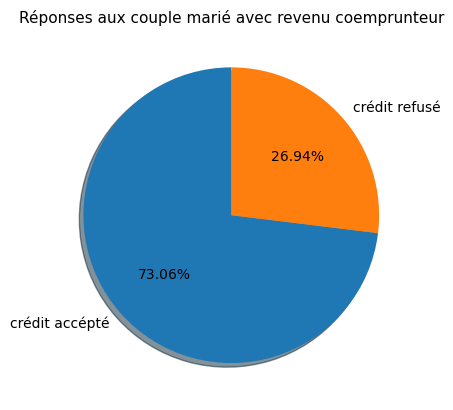

In [99]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux couple marié avec revenu coemprunteur", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [100]:
#profile couple marié au conjoint n'ayant pas de revenus
temp = datax2.copy()
temp = temp.loc[(temp['Married']=='1') & (temp['CoapplicantIncome']==0.0)]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
2    LP001005      1       1          0         1             1   
18   LP001038      1       1          0         0             0   
20   LP001043      1       1          0         0             0   
25   LP001066      1       1          0         1             1   
42   LP001123      1       1          0         1             0   
..        ...    ...     ...        ...       ...           ...   
599  LP002948      1       1          2         1             0   
602  LP002953      1       1          3         1             0   
604  LP002959      0       1          1         1             0   
610  LP002979      1       1          3         1             0   
612  LP002984      1       1          2         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
2             3000.0                0.0        66.0             360.0   
18            4887.0                0.0       133.0             360.0   
20            7660.0                0.0       104.0             360.0   
25            9560.0                0.0       191.0             360.0   
42            2400.0                0.0        75.0             360.0   
..               ...                ...         ...               ...   
599           5780.0                0.0       192.0             360.0   
602           5703.0                0.0       128.0             360.0   
604          12000.0                0.0       496.0             360.0   
610           4106.0                0.0        40.0             180.0   
612           7583.0                0.0       187.0             360.0   

    Credit_History Property_Area Loan_Status  
2                1             2           1  
18               1             0           0  
20               0             2           0  
25               1             1           1  
42               1             2           1  
..             ...           ...         ...  
599              1             2           1  
602              1             2           1  
604              1             1           1  
610              1             0           1  
612              1             2           1  

[129 rows x 13 columns]

In [101]:
totalok_ch = temp.loc[(temp['Credit_History']=='1') & (temp['Loan_Status']=='1')].shape[0]+temp.loc[(temp['Credit_History']=='0') & (temp['Loan_Status']=='0')].shape[0]
totalok_ch/temp.shape[0]
# 80 pourcent des cas sont determines par le credit history dans le cas d un couple marié sans coemprunteur..

0.8062015503875969

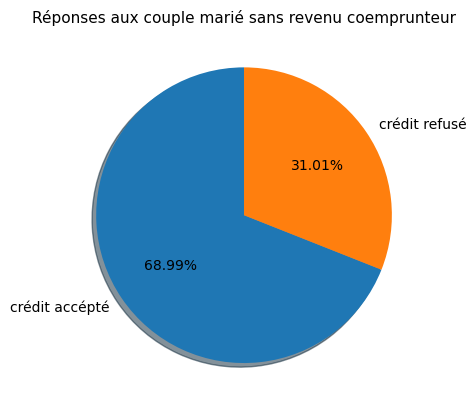

In [102]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux couple marié sans revenu coemprunteur", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [103]:
#profile couple marié au conjoint n'ayant pas de revenus
temp = datax2.copy()
temp = temp.loc[(temp['Married']=='0') & (temp['CoapplicantIncome']!=0.0)]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
13   LP001029      1       0          0         1             0   
29   LP001087      0       0          2         1             0   
34   LP001100      1       0          3         1             0   
38   LP001114      1       0          0         1             0   
39   LP001116      1       0          0         0             0   
..        ...    ...     ...        ...       ...           ...   
577  LP002874      1       0          0         1             0   
579  LP002888      1       0          0         1             0   
581  LP002893      1       0          0         1             0   
600  LP002949      0       0          3         1             0   
603  LP002958      1       0          0         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
13            1853.0             2840.0       114.0             360.0   
29            3750.0             2083.0       120.0             360.0   
34           12500.0             3000.0       320.0             360.0   
38            4166.0             7210.0       184.0             360.0   
39            3748.0             1668.0       110.0             360.0   
..               ...                ...         ...               ...   
577           3229.0             2739.0       110.0             360.0   
579           3182.0             2917.0       161.0             360.0   
581           1836.0            33837.0        90.0             360.0   
600            416.0            41667.0       350.0             180.0   
603           3676.0             4301.0       172.0             360.0   

    Credit_History Property_Area Loan_Status  
13               1             0           0  
29               1             1           1  
34               1             0           0  
38               1             2           1  
39               1             1           1  
..             ...           ...         ...  
577              1             2           1  
579              1             2           1  
581              1             2           0  
600              1             2           0  
603              1             0           1  

[70 rows x 13 columns]

In [104]:
totalok_ch = temp.loc[(temp['Credit_History']=='1') & (temp['Loan_Status']=='1')].shape[0]+temp.loc[(temp['Credit_History']=='0') & (temp['Loan_Status']=='0')].shape[0]
totalok_ch/temp.shape[0]
# 75 pourcent des cas sont determines par le credit history dans le cas d un celibataire avec coemprunteur..

0.7571428571428571

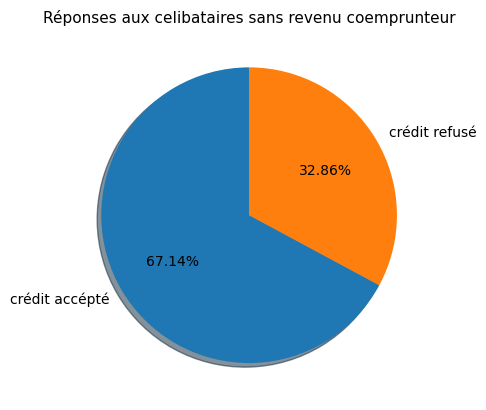

In [105]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux celibataires sans revenu coemprunteur", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [106]:
#profile celibataire n'ayant pas de coemprunteur
temp = datax2.copy()
temp = temp.loc[(temp['Married']=='0') & (temp['CoapplicantIncome']==0.0)]
temp

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002      1       0          0         1             0   
4    LP001008      1       0          0         1             0   
15   LP001032      1       0          0         1             0   
16   LP001034      1       0          1         0             0   
17   LP001036      0       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
592  LP002933      1       0          3         1             1   
595  LP002940      1       0          0         0             0   
597  LP002943      1       0          0         1             0   
609  LP002978      0       0          0         1             0   
613  LP002990      0       0          0         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       138.0             360.0   
4             6000.0                0.0       141.0             360.0   
15            4950.0                0.0       125.0             360.0   
16            3596.0                0.0       100.0             240.0   
17            3510.0                0.0        76.0             360.0   
..               ...                ...         ...               ...   
592           9357.0                0.0       292.0             360.0   
595           3833.0                0.0       110.0             360.0   
597           2987.0                0.0        88.0             360.0   
609           2900.0                0.0        71.0             360.0   
613           4583.0                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0                1             2           1  
4                1             2           1  
15               1             2           1  
16               1             2           1  
17               0             2           0  
..             ...           ...         ...  
592              1             1           1  
595              1             0           1  
597              0             1           0  
609              1             0           1  
613              0             1           0  

[144 rows x 13 columns]

In [107]:
totalok_ch = temp.loc[(temp['Credit_History']=='1') & (temp['Loan_Status']=='1')].shape[0]+temp.loc[(temp['Credit_History']=='0') & (temp['Loan_Status']=='0')].shape[0]
totalok_ch/temp.shape[0]
#74 pourcent des cas sont determines par le credit history dans le cas d un celibataire sans coemprunteur..

0.7430555555555556

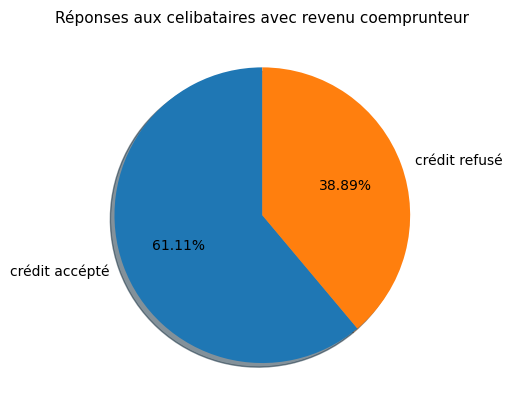

In [108]:
plt.style.use('default')
momo=temp['Loan_Status'].replace({'1':'crédit accépté','0' : 'crédit refusé'}).value_counts().copy()
plt.title("Réponses aux celibataires avec revenu coemprunteur", fontsize=11)
plt.rcParams["figure.figsize"]=[10,10]
plt.pie(momo.values,labels=momo.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10, 'color':"k"})
#plt.savefig("uni_5b.jpg",bbox_inches ="tight")
plt.show()

In [109]:
#profile celibataire n'ayant pas de coemprunteur
temp = datax2.copy()
temp = temp.loc[(temp['ApplicantIncome']==0.0)]
temp
#il nexiste pas d'emprunteur sans revenus dans les données fournies

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

In [110]:
#celibataire sans co emprunteur ou avec : credit history 75%
#marie avec co emprunteur 85
#marie sans co emprunteur 80

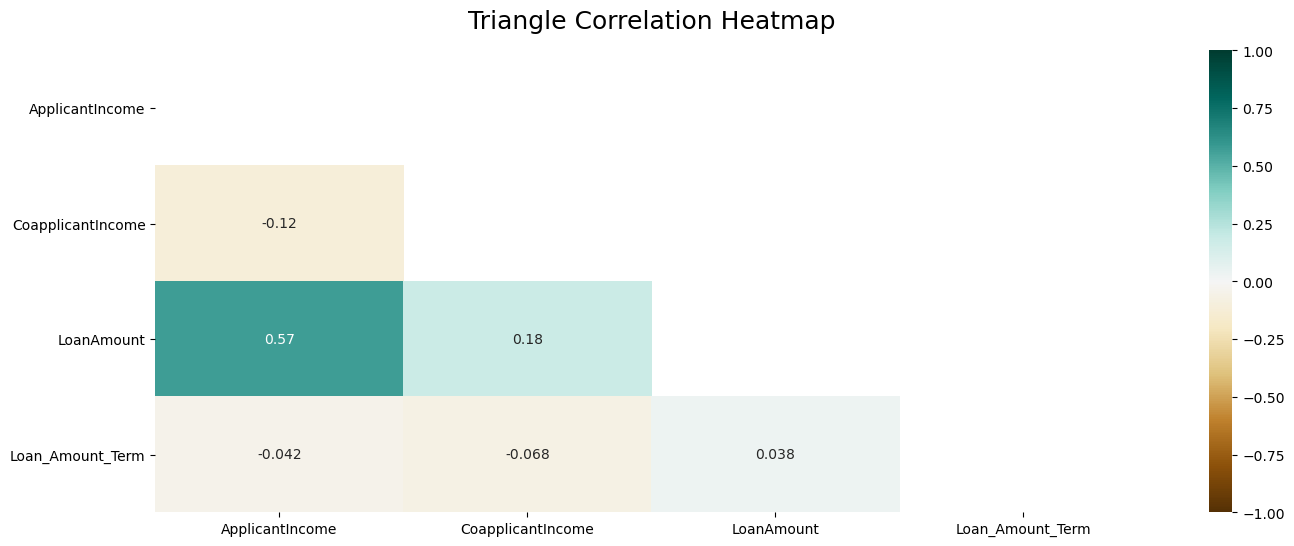

In [111]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(datax2.corr(), dtype=np.bool))
heatmap = sns.heatmap(datax2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
#plt.savefig("quant_heat.jpg",bbox_inches ="tight")

In [112]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            0 non-null      object 
 1   Gender             0 non-null      object 
 2   Married            0 non-null      object 
 3   Dependents         0 non-null      object 
 4   Education          0 non-null      object 
 5   Self_Employed      0 non-null      object 
 6   ApplicantIncome    0 non-null      float64
 7   CoapplicantIncome  0 non-null      float64
 8   LoanAmount         0 non-null      float64
 9   Loan_Amount_Term   0 non-null      float64
 10  Credit_History     0 non-null      object 
 11  Property_Area      0 non-null      object 
 12  Loan_Status        0 non-null      object 
dtypes: float64(4), object(9)
memory usage: 0.0+ bytes


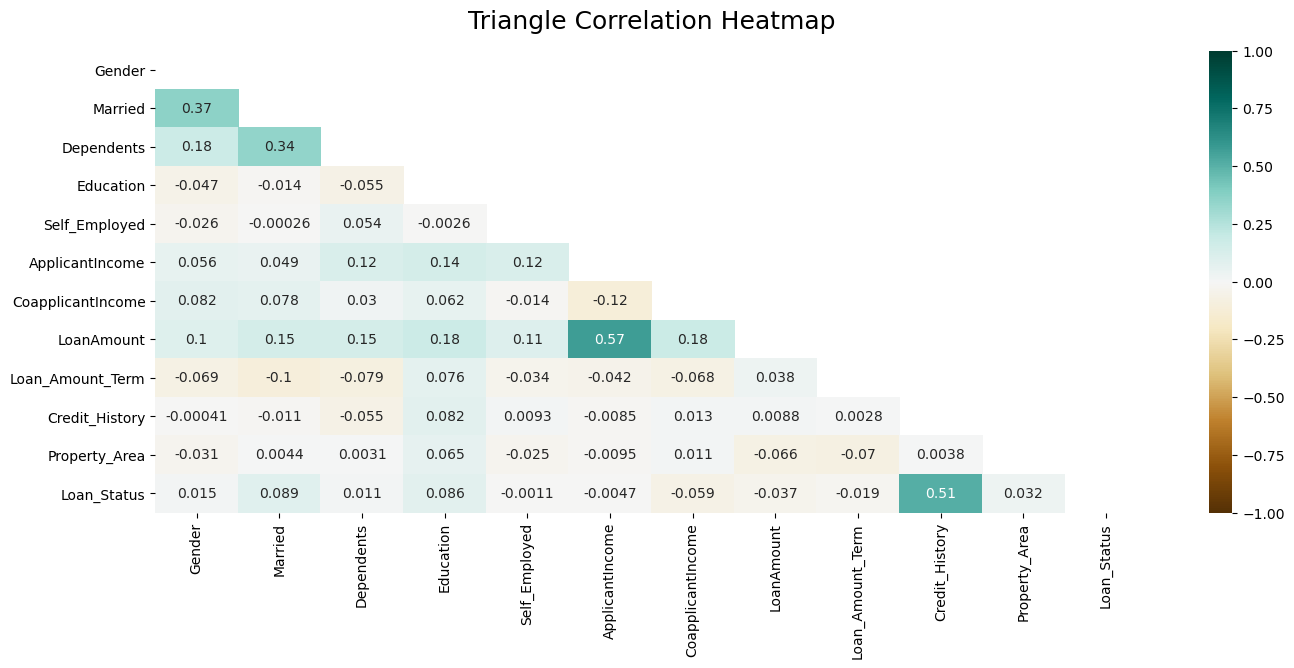

In [113]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
temp = datax2.copy()
temp = temp.iloc[:,1:].astype(int)
mask = np.triu(np.ones_like(temp.corr(), dtype=np.bool))
heatmap = sns.heatmap(temp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.savefig("quant_heat2.jpg",bbox_inches ="tight")

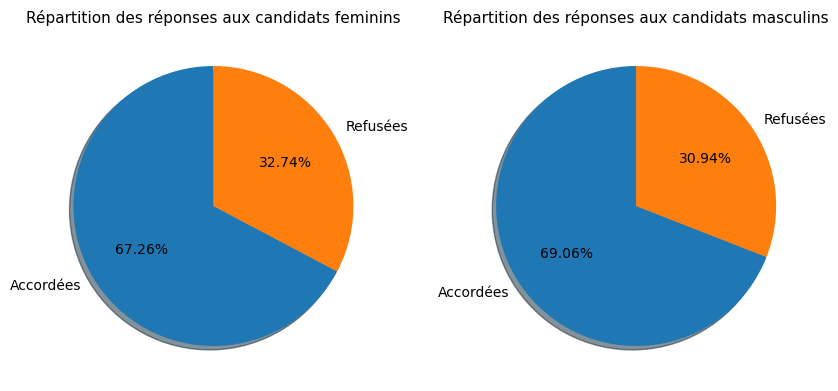

In [114]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
momo['Loan_Status'] = momo['Loan_Status'].replace({'1':'Accordées' ,'0':'Refusées'})
rf = momo[momo['Gender'] == '0']['Loan_Status'].value_counts()/momo[momo['Gender'] == '0'].count()[0]
rh = momo[momo['Gender'] == '1']['Loan_Status'].value_counts()/momo[momo['Gender'] == '1'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(rf.values,labels=rf.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats feminins", fontsize=11)

plt.subplot(222)
plt.pie(rh.values,labels=rh.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats masculins", fontsize=11)

plt.savefig("biv_3.jpg",bbox_inches ="tight")
plt.show()

In [115]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
momo['Loan_Status'] = momo['Loan_Status'].replace({'1':'Accordées' ,'0':'Refusées'})
rc = momo[momo['Married'] == '0']['Loan_Status'].value_counts()/momo[momo['Married'] == '0'].count()[0]
rm = momo[momo['Married'] == '1']['Loan_Status'].value_counts()/momo[momo['Married'] == '1'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(rm.values,labels=rm.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats mariés", fontsize=11)

plt.subplot(222)
plt.pie(rc.values,labels=rc.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats célibataires", fontsize=11)

plt.savefig("biv_4.jpg",bbox_inches ="tight")
plt.show()

In [116]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
momo['Loan_Status'] = momo['Loan_Status'].replace({'1':'Accordées' ,'0':'Refusées'})
rsd = momo[momo['Education'] == '0']['Loan_Status'].value_counts()/momo[momo['Education'] == '0'].count()[0]
rdi = momo[momo['Education'] == '1']['Loan_Status'].value_counts()/momo[momo['Education'] == '1'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(rsd.values,labels=rsd.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des reponses aux candidats non-diplomés", fontsize=11)

plt.subplot(222)
plt.pie(rdi.values,labels=rdi.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des reponses aux candidats diplomés", fontsize=11)

plt.savefig("biv_6.jpg",bbox_inches ="tight")
plt.show()

In [117]:
datax2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
#momo['Loan_Status'] = momo['Loan_Status'].replace({1:'Accepté' ,0:'Refusé'})
momo['Dependents'] = momo['Dependents'].replace({'1' : '1 enfant','0' :'sans enfant','2' : '2 enfants','3' :'3 enfants ou +'})

cra = momo[momo['Loan_Status'] == '1']['Dependents'].value_counts()/momo[momo['Loan_Status'] == '1'].count()[0]
crr = momo[momo['Loan_Status'] == '0']['Dependents'].value_counts()/momo[momo['Loan_Status'] == '0'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(cra.values,labels=cra.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition du nombre d'enfants \n pour les prêts accordés", fontsize=11)

plt.subplot(222)
plt.pie(crr.values,labels=crr.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition du nombre d'enfants \n pour les prêts refusés", fontsize=11)

plt.savefig("biv_7.jpg",bbox_inches ="tight")
plt.show()

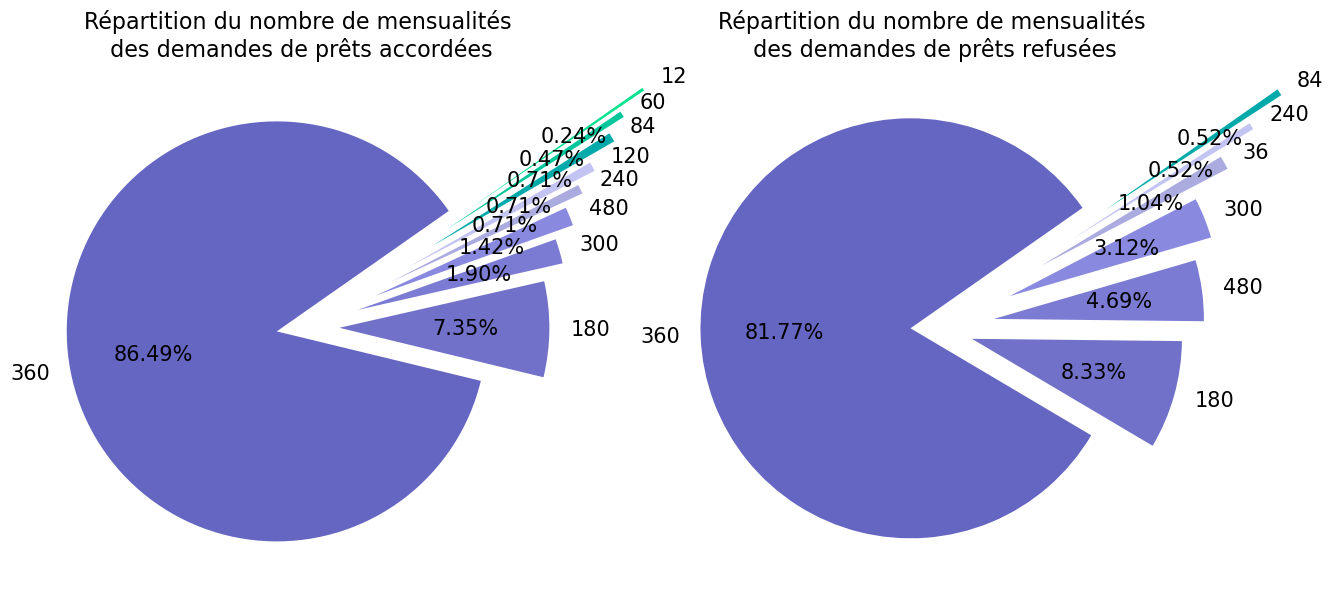

In [119]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[15,15]


plt.subplot(221)
explode = ( 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.75,0.85,1)
colors = ['#6565c2', '#7171c9', '#7b7bd4', '#8989e0', '#ababe0', '#c4c4f2', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', '#0071C6']
momo = datax2[datax2['Loan_Status'] == '1'].copy()
momo["Loan_Amount_Term"] = momo["Loan_Amount_Term"].astype(int)
counts = momo["Loan_Amount_Term"].value_counts(sort=True)
sizes = counts.values.tolist()
plt.axis('equal')
plt.pie(sizes,explode=explode,labels=counts.index,colors=colors,autopct='%1.2f%%',shadow=False,textprops={'fontsize': 15, 'color':"k"},startangle=35)
plt.title("Répartition du nombre de mensualités\n des demandes de prêts accordées", fontsize=16)
#plt.legend(labels=counts.index,loc='lower right')

plt.subplot(222)
explode = ( 0.1, 0.2, 0.3, 0.4, 0.6,0.8,1)
colors = ['#6565c2', '#7171c9', '#7b7bd4', '#8989e0', '#ababe0', '#c4c4f2', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', '#0071C6']
momo = datax2[datax2['Loan_Status'] == '0'].copy()
momo["Loan_Amount_Term"] = momo["Loan_Amount_Term"].astype(int)
counts = momo["Loan_Amount_Term"].value_counts(sort=True)
sizes = counts.values.tolist()
plt.axis('equal')
plt.pie(sizes,explode=explode,labels=counts.index,colors=colors,autopct='%1.2f%%',shadow=False,textprops={'fontsize': 15, 'color':"k"},startangle=35)
#plt.legend(labels=counts.index,loc='lower right')
plt.title("Répartition du nombre de mensualités\n des demandes de prêts refusées", fontsize=16)

plt.savefig("biv_12.jpg",bbox_inches ="tight")
plt.show()

In [120]:
datax2[datax2['Loan_Status'] == '1']["Loan_Amount_Term"].value_counts()

360.0    365
180.0     31
300.0      8
480.0      6
84.0       3
240.0      3
120.0      3
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [121]:
datax2[datax2['Loan_Status'] == '0']["Loan_Amount_Term"].value_counts()

360.0    157
180.0     16
480.0      9
300.0      6
36.0       2
240.0      1
84.0       1
Name: Loan_Amount_Term, dtype: int64

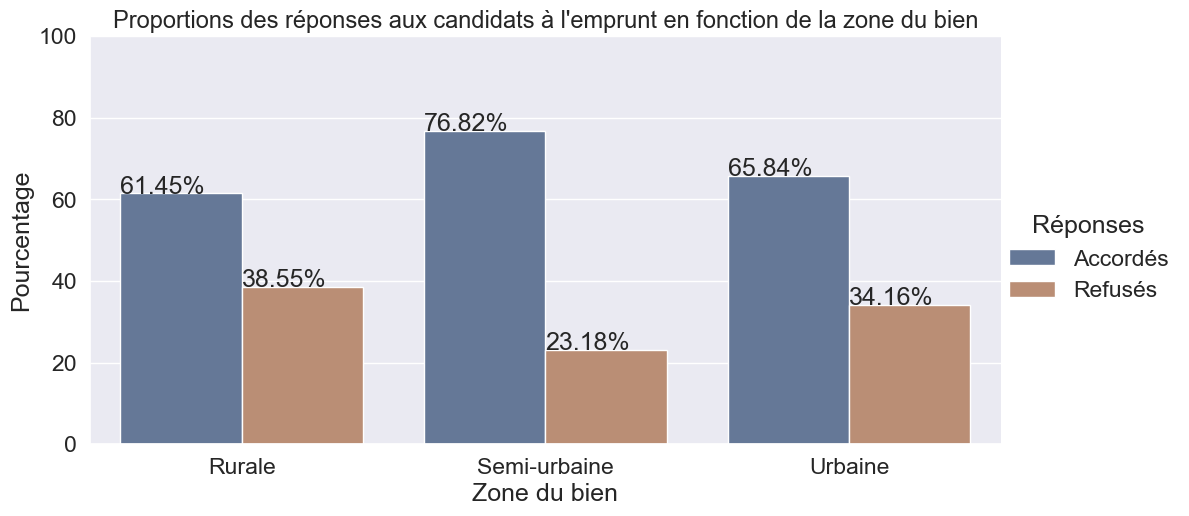

In [122]:
plt.style.use('default')
sns.set(font_scale=1.5)
temp = datax2.copy()
temp["Property_Area"].replace({'0':'Rurale','1':'Semi-urbaine','2':'Urbaine'},inplace=True)
temp["Loan_Status"].replace({'1':'Accordés' ,'0':'Refusés'},inplace=True)
temp.rename(columns={"Property_Area": "Zone du bien", "Loan_Status": "Réponses"},inplace=True)
x,y = 'Zone du bien', 'Réponses'


df1 = temp.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Pourcentage').reset_index()

g = sns.catplot(x=x,y='Pourcentage',hue=y,kind='bar',data=df1, saturation=.5, ci=None, aspect=2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

plt.title("Proportions des réponses aux candidats à l'emprunt en fonction de la zone du bien", fontsize=17)
plt.savefig("biv_13.jpg",bbox_inches ="tight")
plt.show()

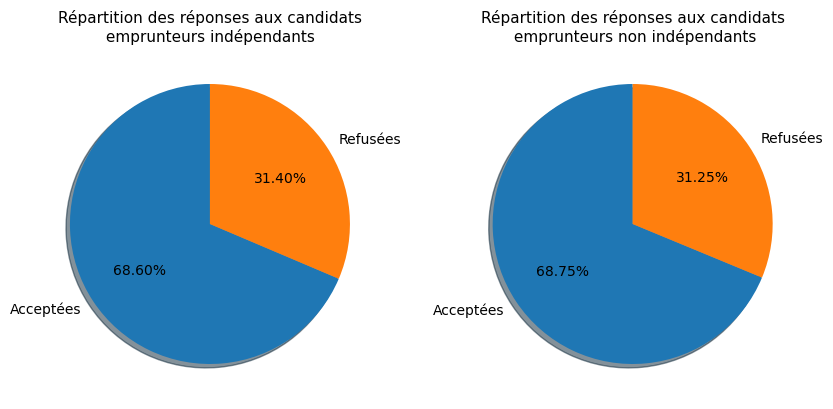

In [123]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
momo['Loan_Status'] = momo['Loan_Status'].replace({'1':'Acceptées' ,'0':'Refusées'})
rsd = momo[momo['Self_Employed'] == '0']['Loan_Status'].value_counts()/momo[momo['Self_Employed'] == '0'].count()[0]
rdi = momo[momo['Self_Employed'] == '1']['Loan_Status'].value_counts()/momo[momo['Self_Employed'] == '1'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(rdi.values,labels=rdi.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats\n emprunteurs indépendants ", fontsize=11)

plt.subplot(222)
plt.pie(rsd.values,labels=rsd.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats\n emprunteurs non indépendants", fontsize=11)

plt.savefig("biv_14.jpg",bbox_inches ="tight")
plt.show()

In [124]:
datax2.groupby("Loan_Status")["Self_Employed"].value_counts(normalize=True)

Loan_Status  Self_Employed
0            0                0.859375
             1                0.140625
1            0                0.860190
             1                0.139810
Name: Self_Employed, dtype: float64

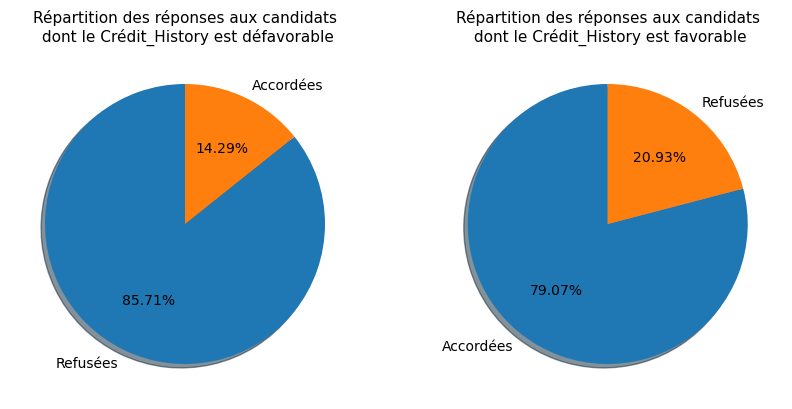

In [125]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[10,10]
momo = datax2.copy()
momo['Loan_Status'] = momo['Loan_Status'].replace({'1':'Accordées' ,'0':'Refusées'})
rf = momo[momo['Credit_History'] == '0']['Loan_Status'].value_counts()/momo[momo['Credit_History'] == '0'].count()[0]
rh = momo[momo['Credit_History'] == '1']['Loan_Status'].value_counts()/momo[momo['Credit_History'] == '1'].count()[0]
#momo = momo['Loan_Status'].value_counts()/momo['Loan_Status'].count()

plt.subplot(221)
plt.pie(rf.values,labels=rf.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats\n dont le Crédit_History est défavorable", fontsize=11)

plt.subplot(222)
plt.pie(rh.values,labels=rh.index,autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des réponses aux candidats\n dont le Crédit_History est favorable", fontsize=11)

plt.savefig("biv_9.jpg",bbox_inches ="tight")
plt.show()

In [126]:
datax2.groupby("Loan_Status")["Credit_History"].value_counts(normalize=True)

Loan_Status  Credit_History
0            1                 0.562500
             0                 0.437500
1            1                 0.966825
             0                 0.033175
Name: Credit_History, dtype: float64

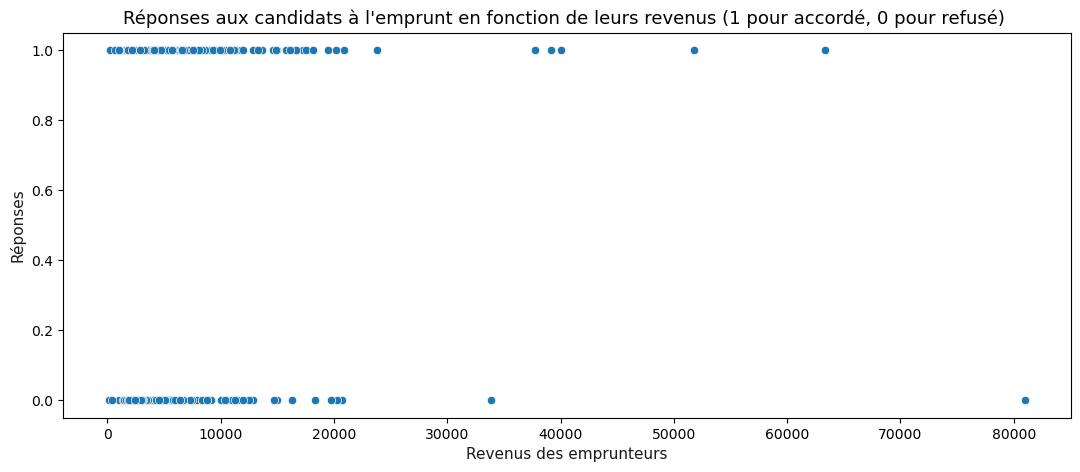

In [127]:
sns.reset_defaults()
plt.figure(figsize=(13, 5))
tempdat=datax2.copy()
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x="ApplicantIncome", y="Loan_Status", data=tempdat)
plt.xlabel("Revenus des emprunteurs",color='k',fontsize=11)
plt.ylabel("Réponses", color='k',fontsize=11)
plt.title("Réponses aux candidats à l'emprunt en fonction de leurs revenus (1 pour accordé, 0 pour refusé) ", fontsize=13)
#plt.legend(title='Loan_Status')  # add a title to the legend
plt.savefig("biv_10.jpg",bbox_inches ="tight")
plt.draw()

In [128]:
datax2[datax2['Loan_Status'] == '0'].sort_values("ApplicantIncome")

Loan_ID Gender Married Dependents Education Self_Employed  \
216  LP001722      1       1          0         1             0   
600  LP002949      0       0          3         1             0   
77   LP001259      1       1          1         1             1   
82   LP001267      0       1          2         1             0   
28   LP001086      1       0          0         0             0   
..        ...    ...     ...        ...       ...           ...   
369  LP002191      1       1          0         1             0   
308  LP001996      1       0          0         1             0   
284  LP001922      1       1          0         1             0   
183  LP001637      1       1          1         1             0   
409  LP002317      1       1          3         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
216            150.0             1800.0       135.0             360.0   
600            416.0            41667.0       350.0             180.0   
77            1000.0             3022.0       110.0             360.0   
82            1378.0             1881.0       167.0             360.0   
28            1442.0                0.0        35.0             360.0   
..               ...                ...         ...               ...   
369          19730.0             5266.0       570.0             360.0   
308          20233.0                0.0       480.0             360.0   
284          20667.0                0.0       480.0             360.0   
183          33846.0                0.0       260.0             360.0   
409          81000.0                0.0       360.0             360.0   

    Credit_History Property_Area Loan_Status  
216              1             0           0  
600              1             2           0  
77               1             2           0  
82               1             2           0  
28               1             2           0  
..             ...           ...         ...  
369              1             0           0  
308              1             0           0  
284              1             0           0  
183              1             1           0  
409              0             0           0  

[192 rows x 13 columns]

In [129]:
datax2[datax2['Loan_Status'] == '1'].sort_values("ApplicantIncome").tail(10)

Loan_ID Gender Married Dependents Education Self_Employed  \
534  LP002731      0       0          0         0             1   
561  LP002813      0       1          1         1             1   
130  LP001469      1       0          0         1             1   
506  LP002624      1       1          0         1             0   
126  LP001448      1       1          3         1             0   
443  LP002422      1       0          1         1             0   
185  LP001640      1       1          0         1             1   
155  LP001536      1       1          3         1             0   
171  LP001585      1       1          3         1             0   
333  LP002101      1       1          0         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
534          18165.0                0.0       125.0             360.0   
561          19484.0                0.0       600.0             360.0   
130          20166.0                0.0       650.0             480.0   
506          20833.0             6667.0       480.0             360.0   
126          23803.0                0.0       370.0             360.0   
443          37719.0                0.0       152.0             360.0   
185          39147.0             4750.0       120.0             360.0   
155          39999.0                0.0       600.0             180.0   
171          51763.0                0.0       700.0             300.0   
333          63337.0                0.0       490.0             180.0   

    Credit_History Property_Area Loan_Status  
534              1             2           1  
561              1             1           1  
130              1             2           1  
506              1             2           1  
126              1             0           1  
443              1             1           1  
185              1             1           1  
155              0             1           1  
171              1             2           1  
333              1             2           1

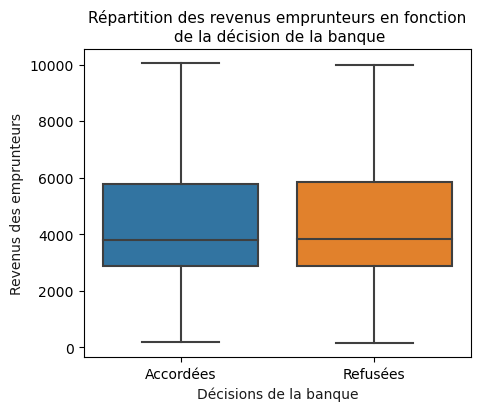

In [130]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[5,4]
sns.boxplot(y=datax2["ApplicantIncome"], x=datax2["Loan_Status"].replace({'1' : 'Accordées','0' :'Refusées'}), showfliers=False)
plt.title("Répartition des revenus emprunteurs en fonction\n de la décision de la banque", fontsize=11)
plt.ylabel("Revenus des emprunteurs",color='k',fontsize=10)
plt.xlabel("Décisions de la banque", color='k',fontsize=10)
#plt.savefig("biv_10aa.jpg",bbox_inches ="tight")
plt.draw()

In [131]:
datax2

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002      1       0          0         1             0   
1    LP001003      1       1          1         1             0   
2    LP001005      1       1          0         1             1   
3    LP001006      1       1          0         0             0   
4    LP001008      1       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
609  LP002978      0       0          0         1             0   
610  LP002979      1       1          3         1             0   
611  LP002983      1       1          1         1             0   
612  LP002984      1       1          2         1             0   
613  LP002990      0       0          0         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       138.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0                1             2           1  
1                1             0           0  
2                1             2           1  
3                1             2           1  
4                1             2           1  
..             ...           ...         ...  
609              1             0           1  
610              1             0           1  
611              1             2           1  
612              1             2           1  
613              0             1           0  

[614 rows x 13 columns]

In [132]:
sns.reset_defaults()
plt.figure(figsize=(13, 5))
tempdat=datax2.copy()
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x="CoapplicantIncome", y="Loan_Status", data=tempdat)
plt.xlabel("Revenus du co-emprunteur",color='k',fontsize=11)
plt.ylabel("Réponses", color='k',fontsize=11)
plt.title("Réponses aux candidats à l'emprunt en fonction des revenus du co-emprunteur (1 pour accordé, 0 pour refusé) ", fontsize=13)
#plt.legend(title='Loan_Status')  # add a title to the legend
plt.savefig("biv_10a.jpg",bbox_inches ="tight")
plt.draw()

In [133]:
tempdat[tempdat['CoapplicantIncome'] > 30000]

Loan_ID Gender Married Dependents Education Self_Employed  \
581  LP002893      1       0          0         1             0   
600  LP002949      0       0          3         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
581           1836.0            33837.0        90.0             360.0   
600            416.0            41667.0       350.0             180.0   

    Credit_History Property_Area  Loan_Status  
581              1             2            0  
600              1             2            0

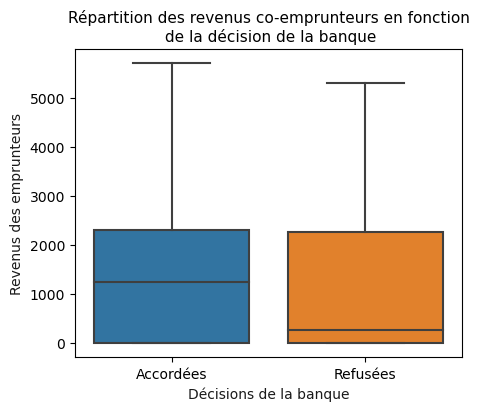

In [134]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[5,4]
sns.boxplot(y=datax2["CoapplicantIncome"], x=datax2["Loan_Status"].replace({'1' : 'Accordées','0' :'Refusées'}), showfliers=False)
plt.title("Répartition des revenus co-emprunteurs en fonction\n de la décision de la banque", fontsize=11)
plt.ylabel("Revenus des emprunteurs",color='k',fontsize=10)
plt.xlabel("Décisions de la banque", color='k',fontsize=10)
#plt.savefig("biv_10bb.jpg",bbox_inches ="tight")
plt.draw()

In [135]:
sns.reset_defaults()
plt.figure(figsize=(13, 5))
tempdat=datax2.copy()
#tempdat = tempdat[tempdat['Married'] == '1']
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x=tempdat["ApplicantIncome"]+tempdat["CoapplicantIncome"], y="Loan_Status", data=tempdat)
plt.xlabel("Revenu total",color='k',fontsize=11)
plt.ylabel("réponses", color='k',fontsize=11)
plt.title("Réponses aux candidats à l'emprunt en fonction du revenu total (emprunteur et co-emprunteur)", fontsize=13)
#plt.legend(title='Loan_Status')  # add a title to the legend
#plt.savefig("biv_10.jpg",bbox_inches ="tight")
plt.draw()

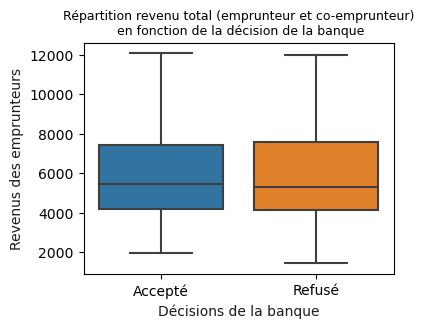

In [136]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[4,3]
sns.boxplot(y=datax2["ApplicantIncome"]+datax2["CoapplicantIncome"], x=datax2["Loan_Status"].replace({'1' : 'Accepté','0' :'Refusé'}), showfliers=False)
plt.title("Répartition revenu total (emprunteur et co-emprunteur)\n en fonction de la décision de la banque", fontsize=9)
plt.ylabel("Revenus des emprunteurs",color='k',fontsize=10)
plt.xlabel("Décisions de la banque", color='k',fontsize=10)
#plt.savefig("biv_11.jpg",bbox_inches ="tight")
plt.draw()

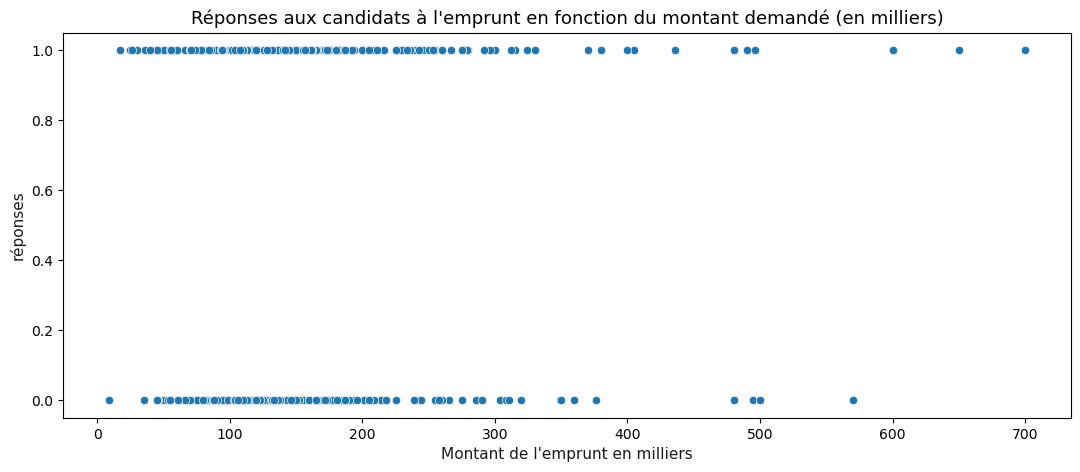

In [137]:
sns.reset_defaults()
plt.figure(figsize=(13, 5))
tempdat=datax2.copy()
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x="LoanAmount", y="Loan_Status", data=tempdat)
plt.xlabel("Montant de l'emprunt en milliers",color='k',fontsize=11)
plt.ylabel("réponses", color='k',fontsize=11)
plt.title("Réponses aux candidats à l'emprunt en fonction du montant demandé (en milliers)", fontsize=13)
#plt.legend(title='Loan_Status')  # add a title to the legend
plt.savefig("biv_10b.jpg",bbox_inches ="tight")
plt.draw()

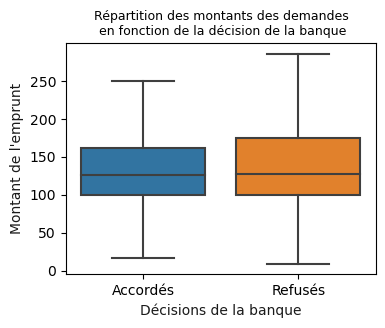

In [138]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[4,3]
sns.boxplot(y=datax2["LoanAmount"], x=datax2["Loan_Status"].replace({'1' : 'Accordés','0' :'Refusés'}), showfliers=False)
plt.title("Répartition des montants des demandes\n en fonction de la décision de la banque", fontsize=9)
plt.ylabel("Montant de l'emprunt",color='k',fontsize=10)
plt.xlabel("Décisions de la banque", color='k',fontsize=10)
#plt.savefig("biv_10cc.jpg",bbox_inches ="tight")
plt.draw()

In [139]:
tempdat[tempdat['LoanAmount'] > 590]

Loan_ID Gender Married Dependents Education Self_Employed  \
130  LP001469      1       0          0         1             1   
155  LP001536      1       1          3         1             0   
171  LP001585      1       1          3         1             0   
561  LP002813      0       1          1         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
130          20166.0                0.0       650.0             480.0   
155          39999.0                0.0       600.0             180.0   
171          51763.0                0.0       700.0             300.0   
561          19484.0                0.0       600.0             360.0   

    Credit_History Property_Area  Loan_Status  
130              1             2            1  
155              0             1            1  
171              1             2            1  
561              1             1            1

In [140]:
sns.reset_defaults()
plt.figure(figsize=(13, 5))
tempdat=datax2.copy()
tempdat = tempdat[tempdat['Married'] == '0']
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x=tempdat["ApplicantIncome"]+tempdat["CoapplicantIncome"], y="Loan_Status", data=tempdat)
plt.xlabel("Revenus du couple",color='k',fontsize=10)
plt.ylabel("réponse", color='k',fontsize=10)
plt.title("Réponse aux célibataires avec et sans co-emprunteurs ", fontsize=11)
#plt.legend(title='Loan_Status')  # add a title to the legend
#plt.savefig("biv_10.jpg",bbox_inches ="tight")
plt.draw()

In [141]:
datax2.loc[(datax2['Loan_Amount_Term']== 36)]

Loan_ID Gender Married Dependents Education Self_Employed  \
262  LP001870      0       0          1         1             0   
546  LP002768      1       0          0         0             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
262           3481.0                0.0       155.0              36.0   
546           3358.0                0.0        80.0              36.0   

    Credit_History Property_Area Loan_Status  
262              1             1           0  
546              1             1           0

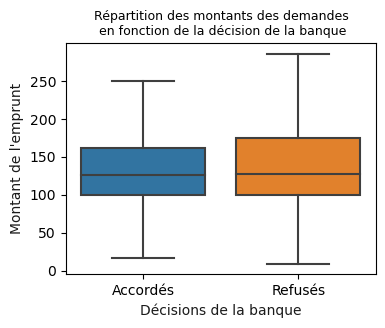

In [142]:
plt.style.use('default')
plt.rcParams["figure.figsize"]=[4,3]
sns.boxplot(y=datax2["LoanAmount"], x=datax2["Loan_Status"].replace({'1' : 'Accordés','0' :'Refusés'}), showfliers=False)
plt.title("Répartition des montants des demandes\n en fonction de la décision de la banque", fontsize=9)
plt.ylabel("Montant de l'emprunt",color='k',fontsize=10)
plt.xlabel("Décisions de la banque", color='k',fontsize=10)
#plt.savefig("biv_10dd.jpg",bbox_inches ="tight")
plt.draw()

In [143]:
datax2[datax2["ApplicantIncome"]>60000]#??????

Loan_ID Gender Married Dependents Education Self_Employed  \
333  LP002101      1       1          0         1             0   
409  LP002317      1       1          3         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
333          63337.0                0.0       490.0             180.0   
409          81000.0                0.0       360.0             360.0   

    Credit_History Property_Area Loan_Status  
333              1             2           1  
409              0             0           0

In [144]:
datax2[datax2["ApplicantIncome"]>60000]

Loan_ID Gender Married Dependents Education Self_Employed  \
333  LP002101      1       1          0         1             0   
409  LP002317      1       1          3         1             0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
333          63337.0                0.0       490.0             180.0   
409          81000.0                0.0       360.0             360.0   

    Credit_History Property_Area Loan_Status  
333              1             2           1  
409              0             0           0

In [145]:
datax2.pivot_table(index = 'Loan_Status')

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
Loan_Status                                                                  
0                5446.078125        1877.807292  150.729167        343.312500
1                5384.068720        1504.514218  143.971564        340.578199

In [146]:
temp = datax2.copy()
temp = temp.set_index('Loan_ID')
temp = temp.astype(int)
temp.pivot_table(index = 'Loan_Status')

ApplicantIncome  CoapplicantIncome  Credit_History  Dependents  \
Loan_Status                                                                   
0                5446.078125        1877.807292        0.562500    0.744792   
1                5384.068720        1504.514218        0.966825    0.767773   

             Education    Gender  LoanAmount  Loan_Amount_Term   Married  \
Loan_Status                                                                
0             0.729167  0.807292  150.729167        343.312500  0.588542   
1             0.805687  0.819905  143.971564        340.578199  0.680095   

             Property_Area  Self_Employed  
Loan_Status                                
0                 1.000000       0.140625  
1                 1.054502       0.139810

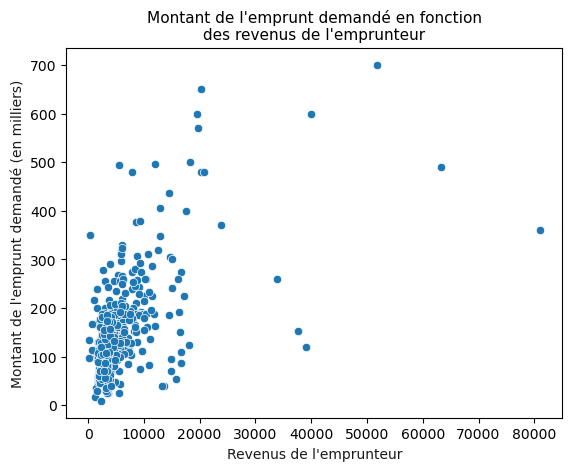

In [147]:
plt.style.use('default')
tempdat=datax2.copy()
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=tempdat)
plt.xlabel("Revenus de l'emprunteur",color='k',fontsize=10)
plt.ylabel("Montant de l'emprunt demandé (en milliers)", color='k',fontsize=10)
plt.title("Montant de l'emprunt demandé en fonction\n des revenus de l'emprunteur ", fontsize=11)
#plt.legend(title='Loan_Status')  # add a title to the legend
plt.savefig("biv_11a.jpg",bbox_inches ="tight")
plt.draw()

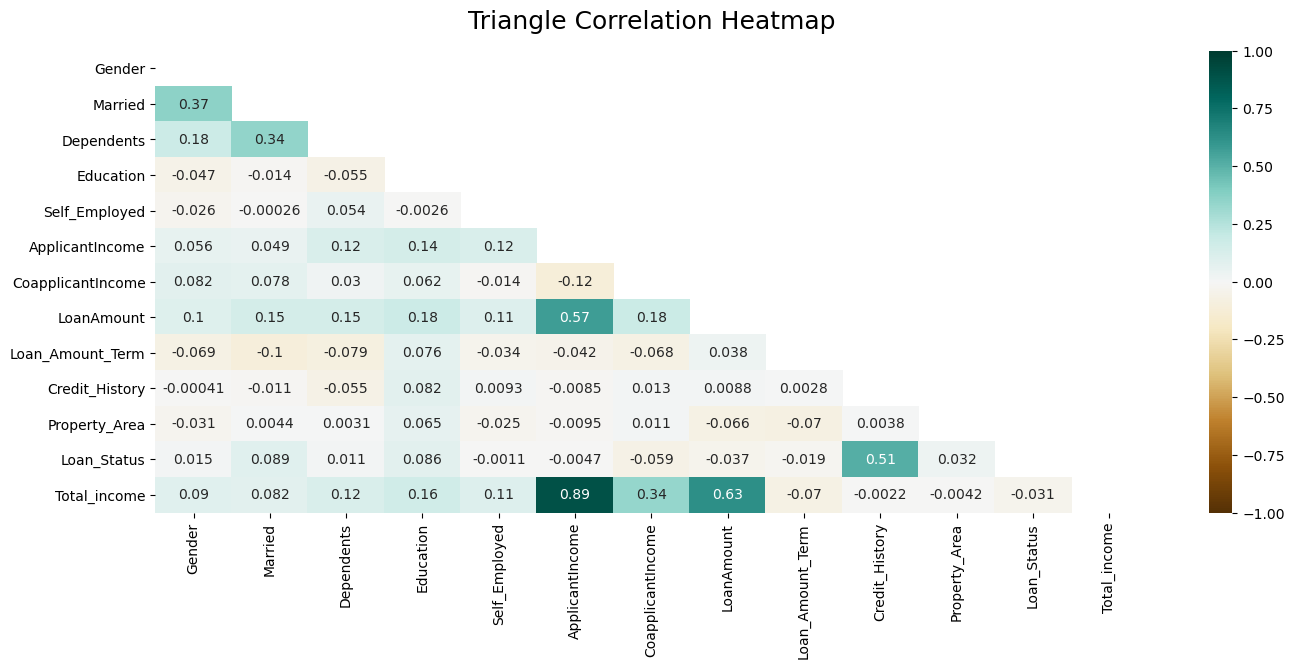

In [148]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle
temp = datax2.copy()
#temp['Total_income'] = temp["ApplicantIncome"]+temp["CoapplicantIncome"]
temp['Total_income'] = (temp["ApplicantIncome"]+temp["CoapplicantIncome"])/2
datax3 = temp.copy()#creation de datax3 avec colonne revenu total emprunteur et coemprunteur(Total_income)
temp = temp.iloc[:,1:].astype(int)
mask = np.triu(np.ones_like(temp.corr(), dtype=np.bool))
heatmap = sns.heatmap(temp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
#plt.savefig("quant_heat3.jpg",bbox_inches ="tight")

In [149]:
#correlation revenus totaux avec montant de l emprunt
(datax2["ApplicantIncome"]+datax2["CoapplicantIncome"]).corr(datax2["LoanAmount"])

0.6257371865213122

In [150]:
#correlation revenus emprunteur avec montant de l emprunt
datax2["ApplicantIncome"].corr(datax2["LoanAmount"])

0.5737013316457318

In [151]:
del temp
datax3

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002      1       0          0         1             0   
1    LP001003      1       1          1         1             0   
2    LP001005      1       1          0         1             1   
3    LP001006      1       1          0         0             0   
4    LP001008      1       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
609  LP002978      0       0          0         1             0   
610  LP002979      1       1          3         1             0   
611  LP002983      1       1          1         1             0   
612  LP002984      1       1          2         1             0   
613  LP002990      0       0          0         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       138.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0        71.0             360.0   
610           4106.0                0.0        40.0             180.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  Total_income  
0                1             2           1        2924.5  
1                1             0           0        3045.5  
2                1             2           1        1500.0  
3                1             2           1        2470.5  
4                1             2           1        3000.0  
..             ...           ...         ...           ...  
609              1             0           1        1450.0  
610              1             0           1        2053.0  
611              1             2           1        4156.0  
612              1             2           1        3791.5  
613              0             1           0        2291.5  

[614 rows x 14 columns]

In [152]:
#réorganisation des colonnes
datax3 = datax3[['Loan_ID','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','Total_income', 'LoanAmount','Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']]

In [153]:
plt.style.use('default')
tempdat=datax3.copy()
#tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(str)
tempdat['Loan_Status'] = tempdat['Loan_Status'].astype(int)
sns.scatterplot(x="Total_income", y="LoanAmount", data=tempdat)
plt.xlabel("Revenu total",color='k',fontsize=10)
plt.ylabel("Montant de l'emprunt demandé (en milliers)", color='k',fontsize=10)
plt.title("Montant de l'emprunt demandé en fonction du revenu total\n (emprunteur et co-emprunteur) ", fontsize=11)
#plt.legend(title='Loan_Status')  # add a title to the legend
plt.savefig("biv_11b.jpg",bbox_inches ="tight")
plt.draw()

In [154]:
datax3.head()

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002      1       0          0         1             0   
1  LP001003      1       1          1         1             0   
2  LP001005      1       1          0         1             1   
3  LP001006      1       1          0         0             0   
4  LP001008      1       0          0         1             0   

   ApplicantIncome  CoapplicantIncome  Total_income  LoanAmount  \
0           5849.0                0.0        2924.5       138.0   
1           4583.0             1508.0        3045.5       128.0   
2           3000.0                0.0        1500.0        66.0   
3           2583.0             2358.0        2470.5       120.0   
4           6000.0                0.0        3000.0       141.0   

   Loan_Amount_Term Property_Area Credit_History Loan_Status  
0             360.0             2              1           1  
1             360.0             0              1           0  
2             360.0             2              1           1  
3             360.0             2              1           1  
4             360.0             2              1           1

In [155]:
datax2.iloc[:,1:].select_dtypes(exclude = 'float')

Gender Married Dependents Education Self_Employed Credit_History  \
0        1       0          0         1             0              1   
1        1       1          1         1             0              1   
2        1       1          0         1             1              1   
3        1       1          0         0             0              1   
4        1       0          0         1             0              1   
..     ...     ...        ...       ...           ...            ...   
609      0       0          0         1             0              1   
610      1       1          3         1             0              1   
611      1       1          1         1             0              1   
612      1       1          2         1             0              1   
613      0       0          0         1             1              0   

    Property_Area Loan_Status  
0               2           1  
1               0           0  
2               2           1  
3               2           1  
4               2           1  
..            ...         ...  
609             0           1  
610             0           1  
611             2           1  
612             2           1  
613             1           0  

[614 rows x 8 columns]

In [156]:
for column in datax2.iloc[:,1:].select_dtypes(exclude = 'float').columns:
    print(datax2[column].groupby(datax2['Loan_Status']).value_counts(normalize=True))

Loan_Status  Gender
0            1         0.807292
             0         0.192708
1            1         0.819905
             0         0.180095
Name: Gender, dtype: float64
Loan_Status  Married
0            1          0.588542
             0          0.411458
1            1          0.680095
             0          0.319905
Name: Married, dtype: float64
Loan_Status  Dependents
0            0             0.572917
             1             0.203125
             2             0.130208
             3             0.093750
1            0             0.575829
             2             0.182464
             1             0.161137
             3             0.080569
Name: Dependents, dtype: float64
Loan_Status  Education
0            1            0.729167
             0            0.270833
1            1            0.805687
             0            0.194313
Name: Education, dtype: float64
Loan_Status  Self_Employed
0            0                0.859375
             1                0.14

In [157]:
datax2['Loan_Status'].groupby(datax2['Gender']).value_counts(normalize=True)

Gender  Loan_Status
0       1              0.672566
        0              0.327434
1       1              0.690619
        0              0.309381
Name: Loan_Status, dtype: float64

In [158]:
df360 = datax2[datax2.Loan_Amount_Term == 360].copy()

In [159]:
df360['Loan_Status'].groupby(datax2['Gender']).value_counts(normalize=True)

Gender  Loan_Status
0       1              0.683168
        0              0.316832
1       1              0.703088
        0              0.296912
Name: Loan_Status, dtype: float64

In [160]:
df360

Loan_ID Gender Married Dependents Education Self_Employed  \
0    LP001002      1       0          0         1             0   
1    LP001003      1       1          1         1             0   
2    LP001005      1       1          0         1             1   
3    LP001006      1       1          0         0             0   
4    LP001008      1       0          0         1             0   
..        ...    ...     ...        ...       ...           ...   
608  LP002974      1       1          0         1             0   
609  LP002978      0       0          0         1             0   
611  LP002983      1       1          1         1             0   
612  LP002984      1       1          2         1             0   
613  LP002990      0       0          0         1             1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       138.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0        66.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             6000.0                0.0       141.0             360.0   
..               ...                ...         ...               ...   
608           3232.0             1950.0       108.0             360.0   
609           2900.0                0.0        71.0             360.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   
613           4583.0                0.0       133.0             360.0   

    Credit_History Property_Area Loan_Status  
0                1             2           1  
1                1             0           0  
2                1             2           1  
3                1             2           1  
4                1             2           1  
..             ...           ...         ...  
608              1             0           1  
609              1             0           1  
611              1             2           1  
612              1             2           1  
613              0             1           0  

[522 rows x 13 columns]

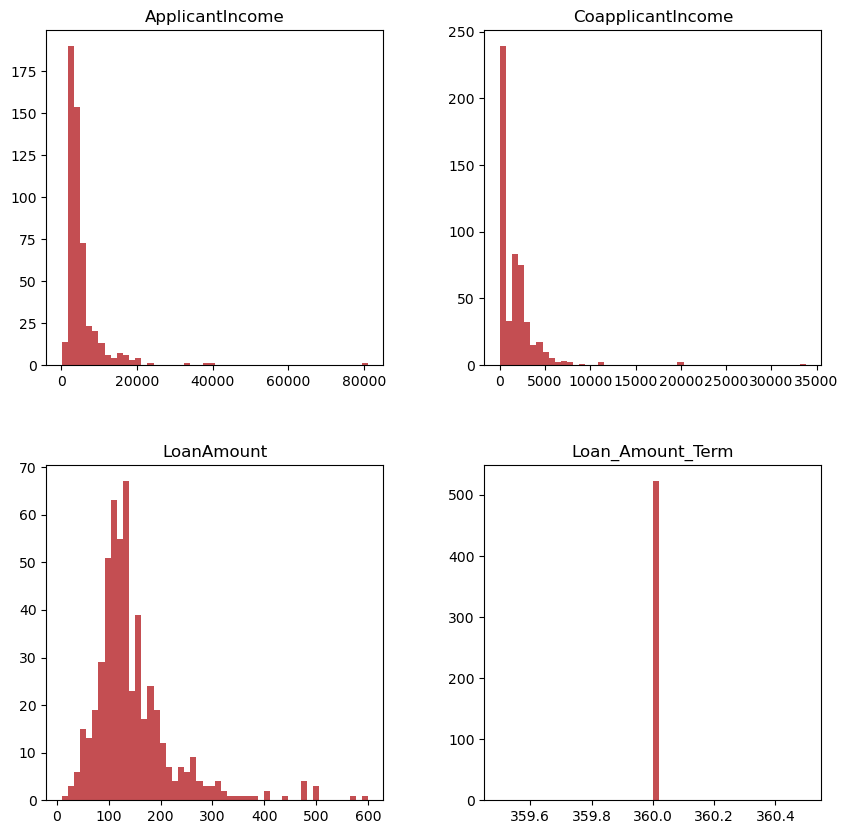

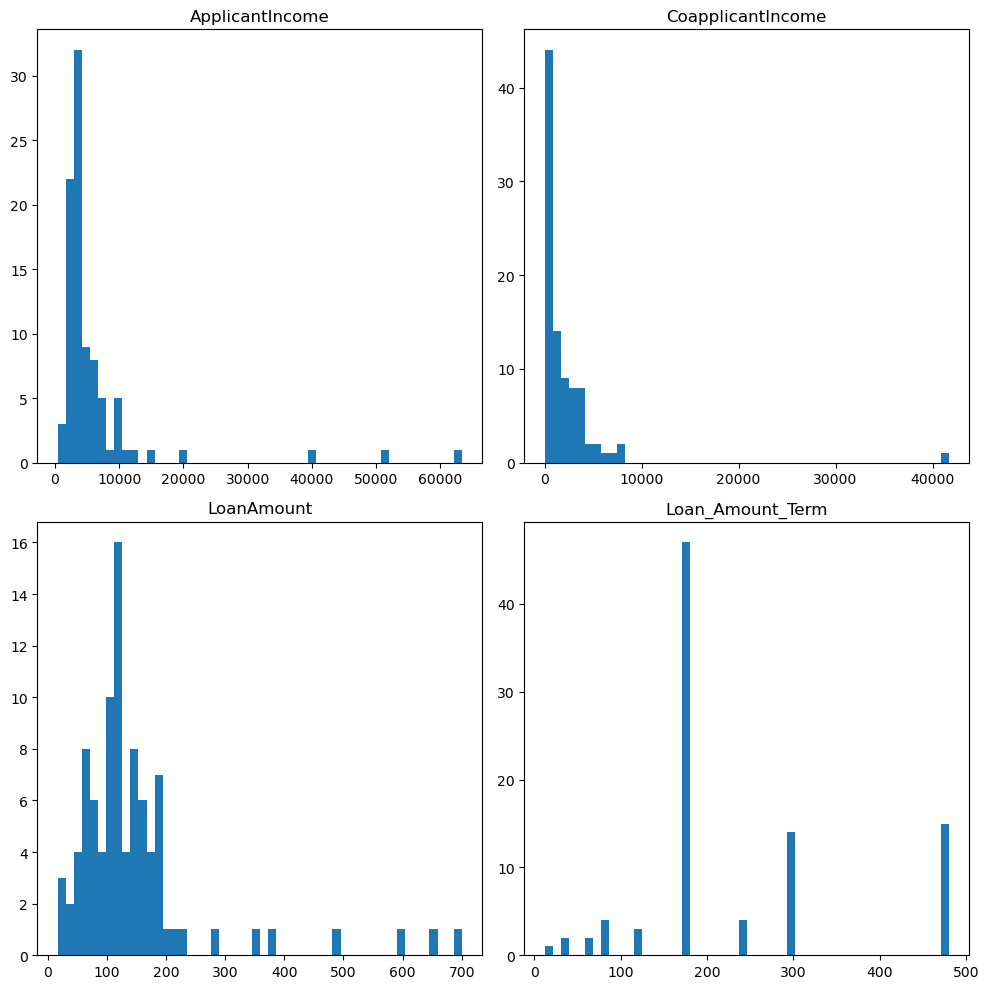

In [161]:
df360.hist(bins=50,figsize=(10,10),grid=False,color='r')
datax2[datax2.Loan_Amount_Term != 360].hist(bins=50,figsize=(10,10),grid=False)
plt.tight_layout()
plt.show()

In [162]:
temp3 = datax2.loc[(datax2['Credit_History']=='0') & (datax2['Loan_Status']=='1')].copy()
temp3.shape[0]/len(datax2)
#un peu plus de 2% de chance d'obtenir un pret si le credit history est a 0

0.02280130293159609

In [163]:
temp3['Loan_Amount_Term'].value_counts()

360.0    10
300.0     2
180.0     2
Name: Loan_Amount_Term, dtype: int64

In [164]:
temp4 = datax2.loc[(datax2['Credit_History']=='1') & (datax2['Loan_Status']=='0')].copy()
temp4.shape[0]/len(datax2)
#un peu plus de 17% de chance de ne pas obtenir le pret si le credit history est a 1

0.1758957654723127

In [165]:
datax2.to_csv('datax2.csv', index = False)

In [166]:
#datax3.to_csv('datax3.csv', index = False)#avec les 2 revenus dans la colonne Total_income

In [167]:
#datax2_so.to_csv('datax2_so.csv', index = False)#sans outliers

In [168]:
#datax2_ao.to_csv('datax2_ao.csv', index = False)#outliers only

In [169]:
del datax2
del datax3
del datax2_so
del datax2_ao

In [170]:
#####on peut aussi commencer d'ici

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import pickle

In [172]:
datax2 = pd.read_csv("datax2.csv")

In [173]:
datax2.set_index('Loan_ID',inplace=True)

In [174]:
datax2.head()

Gender  Married  Dependents  Education  Self_Employed  \
Loan_ID                                                           
LP001002       1        0           0          1              0   
LP001003       1        1           1          1              0   
LP001005       1        1           0          1              1   
LP001006       1        1           0          0              0   
LP001008       1        0           0          1              0   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002           5849.0                0.0       138.0             360.0   
LP001003           4583.0             1508.0       128.0             360.0   
LP001005           3000.0                0.0        66.0             360.0   
LP001006           2583.0             2358.0       120.0             360.0   
LP001008           6000.0                0.0       141.0             360.0   

          Credit_History  Property_Area  Loan_Status  
Loan_ID                                               
LP001002               1              2            1  
LP001003               1              0            0  
LP001005               1              2            1  
LP001006               1              2            1  
LP001008               1              2            1

In [175]:
def test_eval(model,X_train,y_train,X_test,y_test):
    print(f'la précision du model est :', accuracy_score(y_test,model.predict(X_test)))
    print(confusion_matrix(y_test,model.predict(X_test)))

In [176]:
#preparation des donnees de test et d entrainement, utilisons les donnees completes datax2 completees par KNN
#'Self_Employed' retiré des variables independantes car R² = 0 et auc +1 (0.84)
X = datax2.drop(['Loan_Status','Self_Employed'], axis=1)
y = datax2['Loan_Status']
#X_test = datax2[['Married' , 'Education'  , 'CoapplicantIncome' , 'LoanAmount', 'Credit_History']].copy()
#y_test = datax2[['Loan_Status']].copy()

#y=datax2.iloc[:,-1]
#y=datax2_so.iloc[:,-1]


sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]


In [177]:
datax2.drop(['Loan_Status','Self_Employed'], axis=1).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [178]:
print('taille X_train : ',X_train.shape)
print('taille y_train : ',y_train.shape)
print('taille X_test : ',X_test.shape)
print('taille y_test : ',y_test.shape)

taille X_train :  (491, 10)
taille y_train :  (491,)
taille X_test :  (123, 10)
taille y_test :  (123,)


In [179]:
#test du ratio equivalent entre les valeurs d'origine, train et test de la valeur cible.
print("Ratio des donnees d'origine:\n",datax2['Loan_Status'].value_counts(normalize=True))

Ratio des donnees d'origine:
 1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


In [180]:
#test du ratio y_train de la valeur cible.
y_train.value_counts(normalize=True)

1    0.686354
0    0.313646
Name: Loan_Status, dtype: float64

In [181]:
#test du ratio y_test de la valeur cible.
y_test.value_counts(normalize=True)

1    0.691057
0    0.308943
Name: Loan_Status, dtype: float64

In [182]:
#les models

# logistic regression
model1 = LogisticRegression(random_state = 42,max_iter=500)
# RandomForestClassifier
model2 = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=42)
#DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=1,random_state=42)
# KNeighborsClassifier
model4 = KNeighborsClassifier()


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)

In [183]:
# roc curve models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

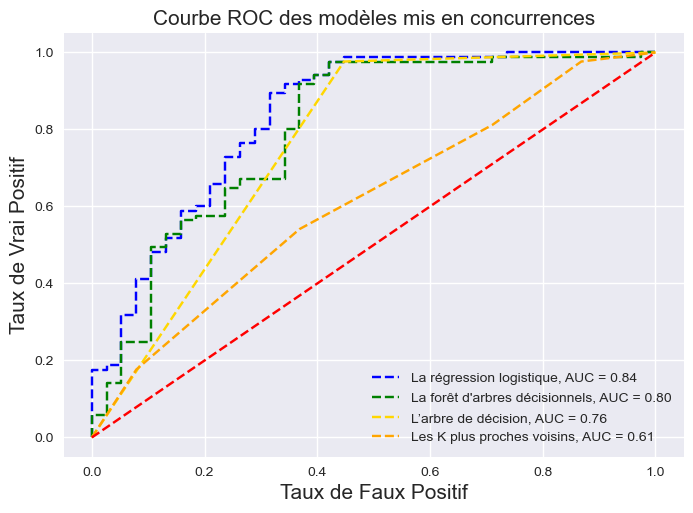

In [184]:
plt.style.use('seaborn')

roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label = "La régression logistique, AUC = %0.2f" % roc_auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label="La forêt d'arbres décisionnels, AUC = %0.2f" % roc_auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='gold', label="L’arbre de décision, AUC = %0.2f" % roc_auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label="Les K plus proches voisins, AUC = %0.2f" % roc_auc4)

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('Courbe ROC des modèles mis en concurrences', fontsize=15)
# x label
plt.xlabel('Taux de Faux Positif', fontsize=15)
# y label
plt.ylabel('Taux de Vrai Positif', fontsize=15)

plt.legend(loc='best')
#plt.savefig('all_ROC',dpi=300)
plt.savefig("all_ROC.jpg",bbox_inches ="tight")
plt.show()

In [185]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

In [186]:
#pour une matrice de confusion détaillée
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    g = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
#   g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

    if xyplotlabels:
        plt.ylabel('Décisions Réelles', fontsize = 13)
        plt.xlabel('Décisions Prédites' + stats_text, fontsize = 13)

    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
labels = ['Vrai Négatif','Faux Positif','Faux Négatif','Vrai Positif']
categories = ['Refusé', 'Accordé']

In [187]:
print('Pour la régression logistique')
print('score AUC : ', auc_score1)
test_eval(model1,X_train,y_train,X_test,y_test)

Pour la régression logistique
score AUC :  0.8359133126934984
la précision du model est : 0.8536585365853658
[[22 16]
 [ 2 83]]


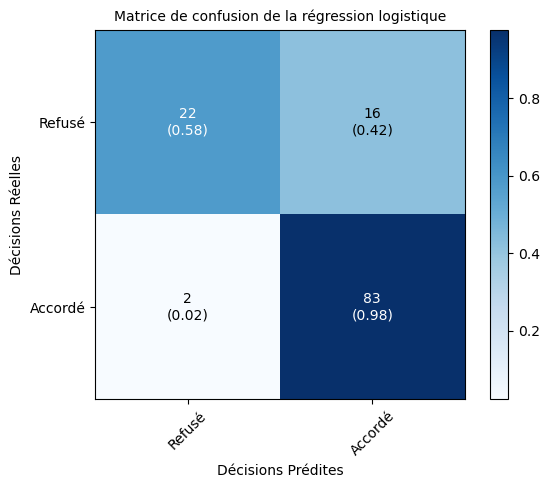

In [188]:
plt.style.use('default')

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,model1.predict(X_test)),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Refusé', 'Accordé'])
plt.ylabel('Décisions Réelles')
plt.xlabel('Décisions Prédites')
plt.title('Matrice de confusion de la régression logistique', fontsize=10)
#plt.savefig("mat_log.jpg",bbox_inches ="tight")
plt.show()

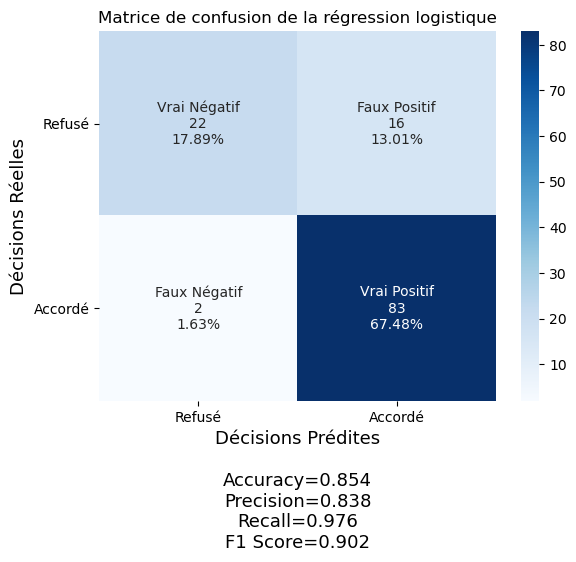

In [189]:
make_confusion_matrix(confusion_matrix(y_test,model1.predict(X_test)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = 'Matrice de confusion de la régression logistique')
plt.savefig("mat_log.jpg",bbox_inches ="tight")

In [190]:
print("Pour la forêt d'arbres décisionnels")
print('score AUC : ', auc_score2)
test_eval(model2,X_train,y_train,X_test,y_test)

Pour la forêt d'arbres décisionnels
score AUC :  0.7993808049535603
la précision du model est : 0.8373983739837398
[[20 18]
 [ 2 83]]


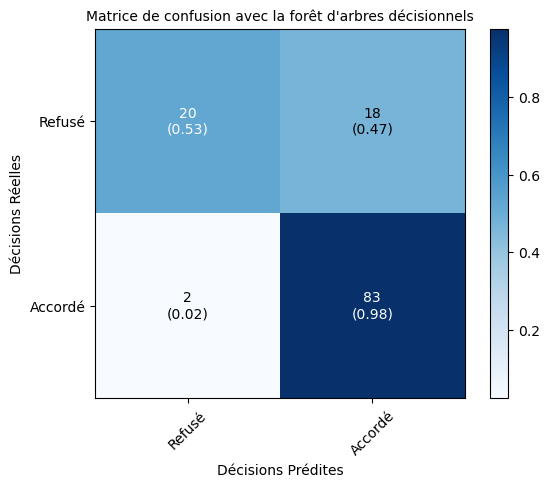

In [191]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,model2.predict(X_test)),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Refusé', 'Accordé'])
plt.ylabel('Décisions Réelles')
plt.xlabel('Décisions Prédites')
plt.title("Matrice de confusion avec la forêt d'arbres décisionnels", fontsize=10)
#plt.savefig("mat_rfc.jpg",bbox_inches ="tight")
plt.show()

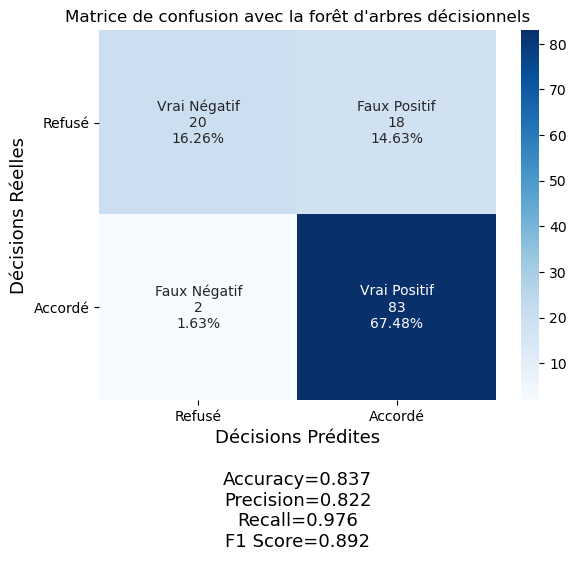

In [192]:
make_confusion_matrix(confusion_matrix(y_test,model2.predict(X_test)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = "Matrice de confusion avec la forêt d'arbres décisionnels")
plt.savefig("mat_rfc.jpg",bbox_inches ="tight")

In [193]:
print("Pour l’arbre de décision")
print('score AUC : ', auc_score3)
test_eval(model3,X_train,y_train,X_test,y_test)

Pour l’arbre de décision
score AUC :  0.7645510835913313
la précision du model est : 0.8455284552845529
[[21 17]
 [ 2 83]]


In [194]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,model3.predict(X_test)),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Refusé', 'Accordé'])
plt.ylabel('Décisions Réelles')
plt.xlabel('Décisions Prédites')
plt.title("Matrice de confusion avec l’arbre de décision", fontsize=10)
#plt.savefig("mat_dtc.jpg",bbox_inches ="tight")
plt.show()

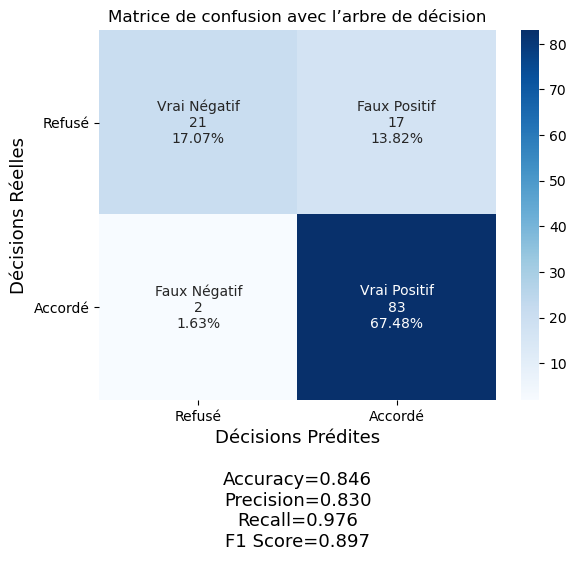

In [195]:
make_confusion_matrix(confusion_matrix(y_test,model3.predict(X_test)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = 'Matrice de confusion avec l’arbre de décision')
plt.savefig("mat_dtc.jpg",bbox_inches ="tight")

In [196]:
print('Pour les K plus proches voisins')
print('score AUC : ', auc_score4)
test_eval(model4,X_train,y_train,X_test,y_test)

Pour les K plus proches voisins
score AUC :  0.6134674922600619
la précision du model est : 0.6504065040650406
[[11 27]
 [16 69]]


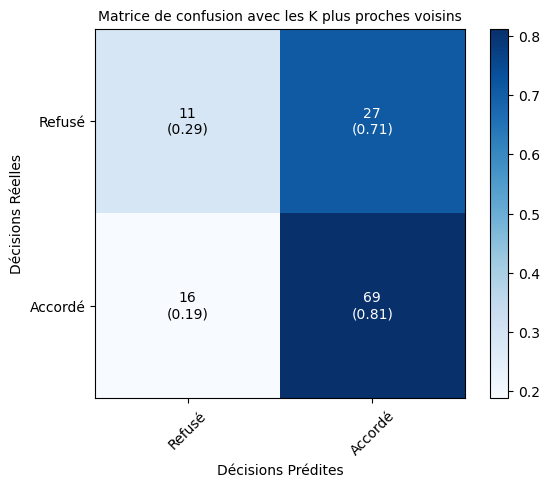

In [197]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,model4.predict(X_test)),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['Refusé', 'Accordé'])
plt.ylabel('Décisions Réelles')
plt.xlabel('Décisions Prédites')
plt.title('Matrice de confusion avec les K plus proches voisins', fontsize=10)
#plt.savefig("mat_knc.jpg",bbox_inches ="tight")
plt.show()

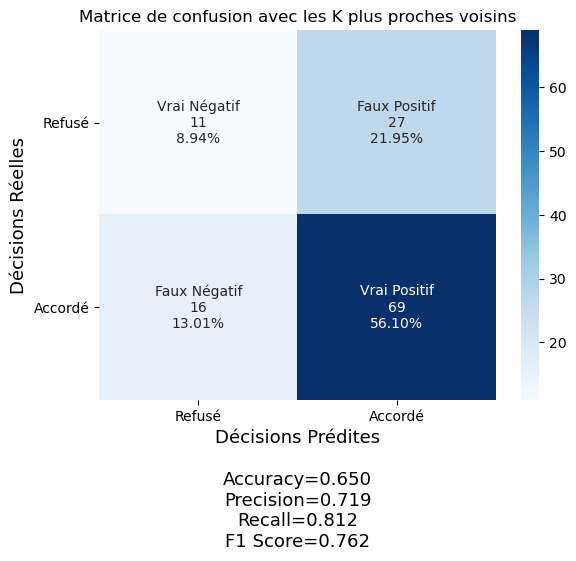

In [198]:
make_confusion_matrix(confusion_matrix(y_test,model4.predict(X_test)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = 'Matrice de confusion avec les K plus proches voisins')
plt.savefig("mat_knc.jpg",bbox_inches ="tight")

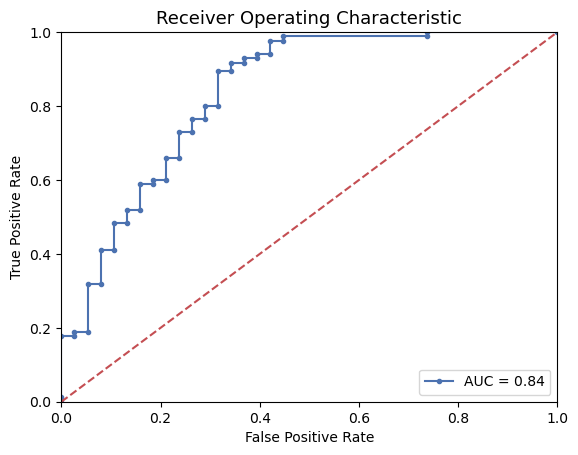

In [199]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=13)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, marker=".")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=10)
plt.xlabel('False Positive Rate', fontsize=10)
plt.savefig("ROC_log.jpg",bbox_inches ="tight")
plt.show()

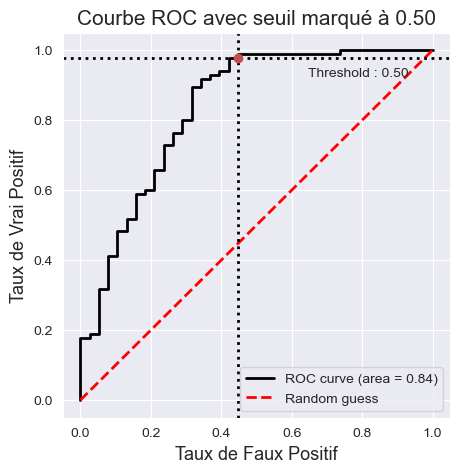

In [200]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, preds, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=0.5)
plt.title('Courbe ROC avec seuil marqué à 0.50', fontsize=15)
# x label
plt.xlabel('Taux de Faux Positif', fontsize=13)
# y label
plt.ylabel('Taux de Vrai Positif', fontsize=13)

plt.savefig("ROC_log050.jpg",bbox_inches ="tight")
plt.show()

Il est difficile de définir le point optimal car nous devons choisir le seuil le plus adapté afin d'accorder le moins de credits possibles a des candidats auquels il n'aurait pas ete accordé sans perdre trop de candidats admissibles  . Cependant, la règle générale est de maximiser (TPR-FPR) qui dans le graphique est représentée par la distance verticale entre la ligne pointillée rouge et la courbe noire .

In [201]:
#dans notre cas nous cherchons a ce que les faux positifs soient le plus bas possible
#afin de ne pas accorder un credit à des candidats auquels nous n'aurions pas du sans perdre trop de clients qui auraient 
#du l'obtenir(faux negatif)baisser faux positifs avec le risque d'augmenter le nombre de faux negatifs

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [203]:
predictions = model1.predict(X_test)
predicted_proba = model1.predict_proba(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, predicted_proba[:, -1])

In [204]:
false_pos_rate -true_pos_rate#choix de la valeur la plus haute

array([ 0.        , -0.01176471, -0.17647059, -0.1501548 , -0.1619195 ,
       -0.13560372, -0.26501548, -0.23869969, -0.33281734, -0.30650155,
       -0.37708978, -0.35077399, -0.38606811, -0.35975232, -0.43034056,
       -0.40402477, -0.41578947, -0.38947368, -0.44829721, -0.42198142,
       -0.49256966, -0.46625387, -0.50154799, -0.4752322 , -0.51052632,
       -0.48421053, -0.57832817, -0.55201238, -0.5755418 , -0.54922601,
       -0.56099071, -0.53467492, -0.54643963, -0.52012384, -0.55541796,
       -0.52910217, -0.54086687, -0.25139319, -0.26315789,  0.        ])

In [205]:
np.abs(true_pos_rate - false_pos_rate)#choix de la valeur la plus haute

array([0.        , 0.01176471, 0.17647059, 0.1501548 , 0.1619195 ,
       0.13560372, 0.26501548, 0.23869969, 0.33281734, 0.30650155,
       0.37708978, 0.35077399, 0.38606811, 0.35975232, 0.43034056,
       0.40402477, 0.41578947, 0.38947368, 0.44829721, 0.42198142,
       0.49256966, 0.46625387, 0.50154799, 0.4752322 , 0.51052632,
       0.48421053, 0.57832817, 0.55201238, 0.5755418 , 0.54922601,
       0.56099071, 0.53467492, 0.54643963, 0.52012384, 0.55541796,
       0.52910217, 0.54086687, 0.25139319, 0.26315789, 0.        ])

In [206]:
proba#0.68940267

array([1.94268492, 0.94268492, 0.83399791, 0.83221954, 0.82883704,
       0.82787785, 0.8169723 , 0.81676228, 0.80610567, 0.80534603,
       0.80017221, 0.79972306, 0.79620872, 0.79616381, 0.78926176,
       0.78811031, 0.78761665, 0.78630042, 0.77478641, 0.77153429,
       0.76141856, 0.75791696, 0.74836651, 0.7458424 , 0.73729832,
       0.72975911, 0.68940267, 0.68287064, 0.66333155, 0.65177695,
       0.64778281, 0.64595774, 0.63626662, 0.63544665, 0.62309763,
       0.38872623, 0.33991927, 0.23994229, 0.21394144, 0.10346296])

In [207]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_proba[:, -1]]

In [208]:
print('Précision "accuracy" avant et apres optimisation de la valeur seuil: {}, {}'.format(accuracy_score(y_test, predictions), accuracy_score(y_test, roc_predictions)))
print("Score de précision avant et apres optimisation de la valeur seuil: {}, {}".format(precision_score(y_test, predictions), precision_score(y_test, roc_predictions)))
print("Recall Score avant et apres optimisation de la valeur seuil: {}, {}".format(recall_score(y_test, predictions), recall_score(y_test, roc_predictions)))
print("F1 Score avant et apres optimisation de la valeur seuil: {}, {}".format(f1_score(y_test, predictions), f1_score(y_test, roc_predictions)))

Précision "accuracy" avant et apres optimisation de la valeur seuil: 0.8536585365853658, 0.8292682926829268
Score de précision avant et apres optimisation de la valeur seuil: 0.8383838383838383, 0.8636363636363636
Recall Score avant et apres optimisation de la valeur seuil: 0.9764705882352941, 0.8941176470588236
F1 Score avant et apres optimisation de la valeur seuil: 0.9021739130434783, 0.8786127167630058


In [209]:
optimal_proba_cutoff#maxximum vertical distance : max youden's index

0.6894026744322159

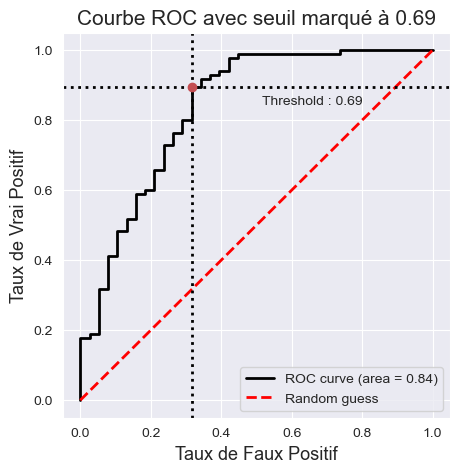

In [210]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, preds, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve(threshold=optimal_proba_cutoff)
plt.title('Courbe ROC avec seuil marqué à 0.69', fontsize=15)
# x label
plt.xlabel('Taux de Faux Positif', fontsize=13)
# y label
plt.ylabel('Taux de Vrai Positif', fontsize=13)
plt.savefig("ROC_log069.jpg",bbox_inches ="tight")
#plt.savefig('opt_ROC',dpi=300)
plt.show()

In [211]:
#ou roc_predictions
def probav(dataset):
    #print("modification de la colonne predicted_opt, 1 pour crédit accordé, 0 pour crédit refusé")
    def billet(x):
        if x >= optimal_proba_cutoff :
            return 1
        
        else:
            return 0
        

    dataset['predicted_opt'] = dataset['predicted_opt'].apply(lambda x: billet(x))
    return dataset

In [212]:
df_test = pd.DataFrame({'Loan_Status' : y_test})

In [213]:
df_test['predicted'] = model1.predict(X_test)
df_test['predicted_opt'] = model1.predict_proba(X_test)[:,1]

In [214]:
probav(df_test)

Loan_Status  predicted  predicted_opt
Loan_ID                                        
LP001528            0          0              0
LP002804            1          1              1
LP002945            1          1              1
LP001784            1          1              1
LP001514            1          1              1
...               ...        ...            ...
LP002178            1          0              0
LP001910            0          0              0
LP001014            0          0              0
LP001935            1          1              1
LP002205            0          0              0

[123 rows x 3 columns]

In [215]:
#optimisé, younden index ?
print(confusion_matrix(df_test['Loan_Status'],df_test['predicted_opt']))
print('précission du model :',accuracy_score(df_test['Loan_Status'],df_test['predicted_opt']))

[[26 12]
 [ 9 76]]
précission du model : 0.8292682926829268


In [216]:
cm = confusion_matrix(df_test['Loan_Status'],df_test['predicted_opt'])
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Matrice de confusion avec seuil à 0.69', fontsize=13)
#plt.savefig("mat_log069.jpg",bbox_inches ="tight")
plt.show()

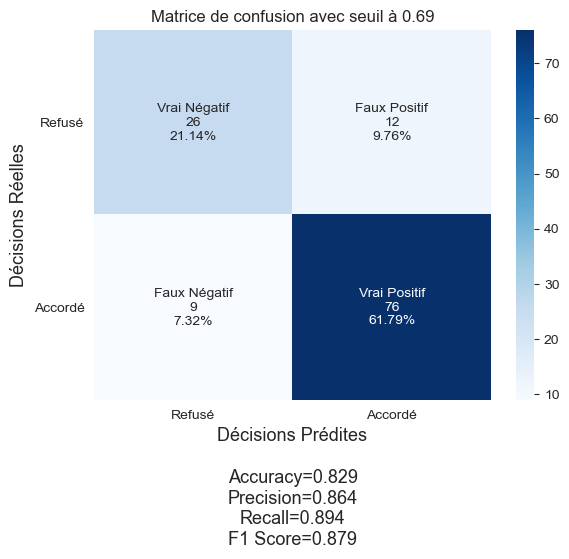

In [217]:
make_confusion_matrix(confusion_matrix(df_test['Loan_Status'],df_test['predicted_opt']), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = "Matrice de confusion avec seuil à 0.69")
plt.savefig("mat_log069.jpg",bbox_inches ="tight")

In [218]:
from sklearn.metrics import classification_report
matrix = classification_report(df_test['Loan_Status'],df_test['predicted_opt'],labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.89      0.88        85
           0       0.74      0.68      0.71        38

    accuracy                           0.83       123
   macro avg       0.80      0.79      0.80       123
weighted avg       0.83      0.83      0.83       123



In [219]:
#classique
print(confusion_matrix(df_test['Loan_Status'],df_test['predicted']))
accuracy_score(df_test['Loan_Status'],df_test['predicted'])

[[22 16]
 [ 2 83]]


0.8536585365853658

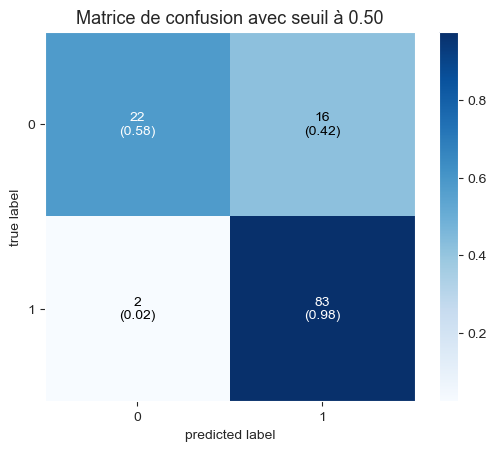

In [220]:
cm = confusion_matrix(df_test['Loan_Status'],df_test['predicted'])
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.title('Matrice de confusion avec seuil à 0.50', fontsize=13)
#plt.savefig("mat_log050.jpg",bbox_inches ="tight")
plt.show()

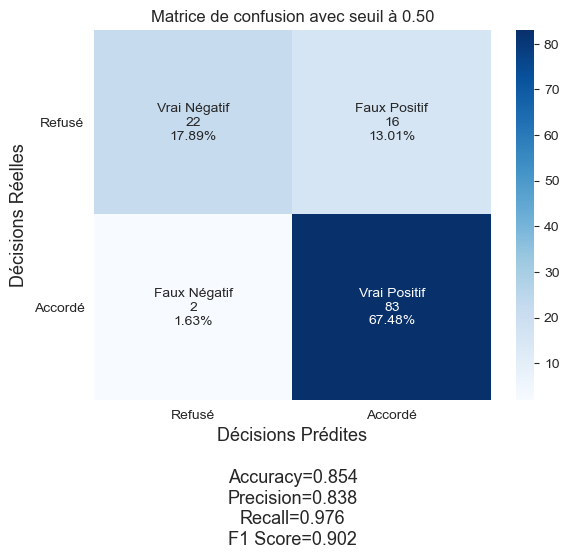

In [221]:
make_confusion_matrix(confusion_matrix(df_test['Loan_Status'],df_test['predicted']), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title = "Matrice de confusion avec seuil à 0.50")
plt.savefig("mat_log050.jpg",bbox_inches ="tight")

In [222]:
from sklearn.metrics import classification_report
matrix = classification_report(df_test['Loan_Status'],df_test['predicted'],labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.98      0.90        85
           0       0.92      0.58      0.71        38

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



In [223]:
#erreurs differences prediction / optimisation / réeel 
df_test[df_test['predicted_opt'] != df_test['predicted']]

Loan_Status  predicted  predicted_opt
Loan_ID                                        
LP002239            1          1              0
LP002603            1          1              0
LP001698            1          1              0
LP001841            1          1              0
LP002637            0          1              0
LP002560            1          1              0
LP001653            1          1              0
LP001100            0          1              0
LP002367            0          1              0
LP001666            1          1              0
LP002140            0          1              0

In [224]:
df_test[['predicted_opt']].value_counts()

predicted_opt
1                88
0                35
dtype: int64

In [225]:
df_test[['predicted']].value_counts()

predicted
1            99
0            24
dtype: int64

In [226]:
df_test[['Loan_Status']].value_counts()

Loan_Status
1              85
0              38
dtype: int64

In [228]:
X_test.head(5)

Gender  Married  Dependents  Education  ApplicantIncome  \
Loan_ID                                                             
LP001528       1        0           0          1           6277.0   
LP002804       0        1           0          1           4180.0   
LP002945       1        1           0          1           9963.0   
LP001784       1        1           1          1           5500.0   
LP001514       0        1           0          1           2330.0   

          CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID                                                                     
LP001528                0.0       118.0             360.0               0   
LP002804             2306.0       182.0             360.0               1   
LP002945                0.0       180.0             360.0               1   
LP001784             1260.0       170.0             360.0               1   
LP001514             4486.0       100.0             360.0               1   

          Property_Area  
Loan_ID                  
LP001528              0  
LP002804              1  
LP002945              0  
LP001784              0  
LP001514              1

In [227]:
X_test.iloc[0,:]

Gender                  1.0
Married                 0.0
Dependents              0.0
Education               1.0
ApplicantIncome      6277.0
CoapplicantIncome       0.0
LoanAmount            118.0
Loan_Amount_Term      360.0
Credit_History          0.0
Property_Area           0.0
Name: LP001528, dtype: float64

In [231]:
X = X_test.iloc[:1,:]

In [235]:
X

Gender  Married  Dependents  Education  ApplicantIncome  \
Loan_ID                                                             
LP001528       1        0           0          1           6277.0   

          CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID                                                                     
LP001528                0.0       118.0             360.0               0   

          Property_Area  
Loan_ID                  
LP001528              0

In [233]:
y_t2 = model1.predict(X)

In [234]:
y_t2 

array([0], dtype=int64)

In [1023]:
cf = confusion_matrix(y_test,model1.predict(X_test))

In [1024]:
precision = cf[1,1] / sum(cf[:,1])

In [1025]:
precision

0.8383838383838383

In [1026]:
cf

array([[22, 16],
       [ 2, 83]], dtype=int64)

In [1027]:
cf[1,1]

83

In [ ]:
 precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])

PR Curve 
The curve is plots values of precision scores (y-axis) against those of recall scores (x-axis) and these values are plotted at various probability thresholds.

There can be two ways of obtaining a more optimal probability threshold for the positive class:

Minimize the difference between precision and recall scores

Select the probability threshold of which precision and recall scores are closest to each other
Euclidean Distance

The most optimal point on the PR curve should be (1,1), i.e. precision and recall scores of 1.
Select the probability threshold as the most optimal one if precision and recall scores are closest fo the ones mentioned in the previous point in terms of Euclidean distance, i.e.
d(recall,precision)=(recall1−recall2)2+precision1−precision2)2−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−√.


obtaining the optimal probability threshold based on minimizing the distance between precision and recall scores.

In [1030]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, plot_precision_recall_curve

In [1031]:
predictions = model1.predict(X_test)
predicted_proba = model1.predict_proba(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, predicted_proba[:, -1])

Text(0.5, 1.0, 'Precision-Recall curve')

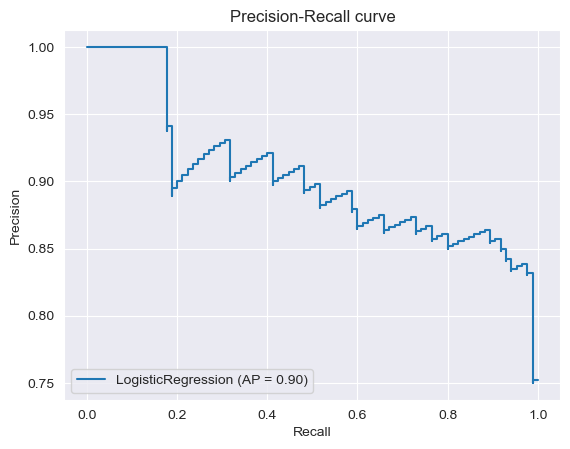

In [1033]:
precision_, recall_, proba = precision_recall_curve(y_test, predicted_proba[:, -1])

disp = plot_precision_recall_curve(model1, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

In [1036]:
optimal_proba_cutoff = sorted(list(zip(np.abs(precision_ - recall_), proba)), key=lambda i: i[0], reverse=False)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in predicted_proba[:, -1]]

In [1037]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, predictions), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, predictions), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, predictions), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, predictions), f1_score(y_test, roc_predictions)))

Accuracy Score Before and After Thresholding: 0.8536585365853658, 0.8048780487804879
Precision Score Before and After Thresholding: 0.8383838383838383, 0.8588235294117647
Recall Score Before and After Thresholding: 0.9764705882352941, 0.8588235294117647
F1 Score Before and After Thresholding: 0.9021739130434783, 0.8588235294117647


In [1038]:
optimal_proba_cutoff

0.7075501794280127

In [185]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    g = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
#   g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

    if xyplotlabels:
        plt.ylabel('Décisions Réelles', fontsize = 13)
        plt.xlabel('Décisions Prédites' + stats_text, fontsize = 13)

    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
labels = ['Vrai Négatif','Faux Positif','Faux Négatif','Vrai Positif']
categories = ['Refusé', 'Accordé']